<font size="4"><p style="text-align:center"><b> СБОРНЫЙ ПРОЕКТ №1</b></p></font>

# Исследование закономерностей, определяющих успешность игры

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования:**

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования:**
1. Обзор данных.
2. Предобработка данных.
  - приведение столбцов к единому виду
  - преобразование типов данных
  - обработка пропусков
  - подсчет суммарных продаж во всех регионах
3. Исследовательский анализ
  - сколько игр выпускалось в разные годы
  - как менялись продажи по платформам
  - какие платформы лидируют по продажам, растут или падают
  - как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
  - общее распределение игр по жанрам
4. Составление портрета пользователя каждого региона
5. Проверка гипотез:
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
6. Общий вывод
  

## Обзор данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math

In [2]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('C:\Python\datasets/games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Имеем 16 715 строк, 11 колонок

Нужно на этапе предобработки перевести типы данных в столбцах: 
- год выпуска 
- оценка пользователей (переведем в числовой, чтобы иметь возможность проводить математические операции

А так же проверить пропуски на возможность заполнения

- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [6]:
games.isna().sum() #смотрим кол-во пропусков

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
# функция для построения графика по % пропусков
def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), legend = False, fontsize = 16)
        .set_title('Кол-во пропусков в %' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

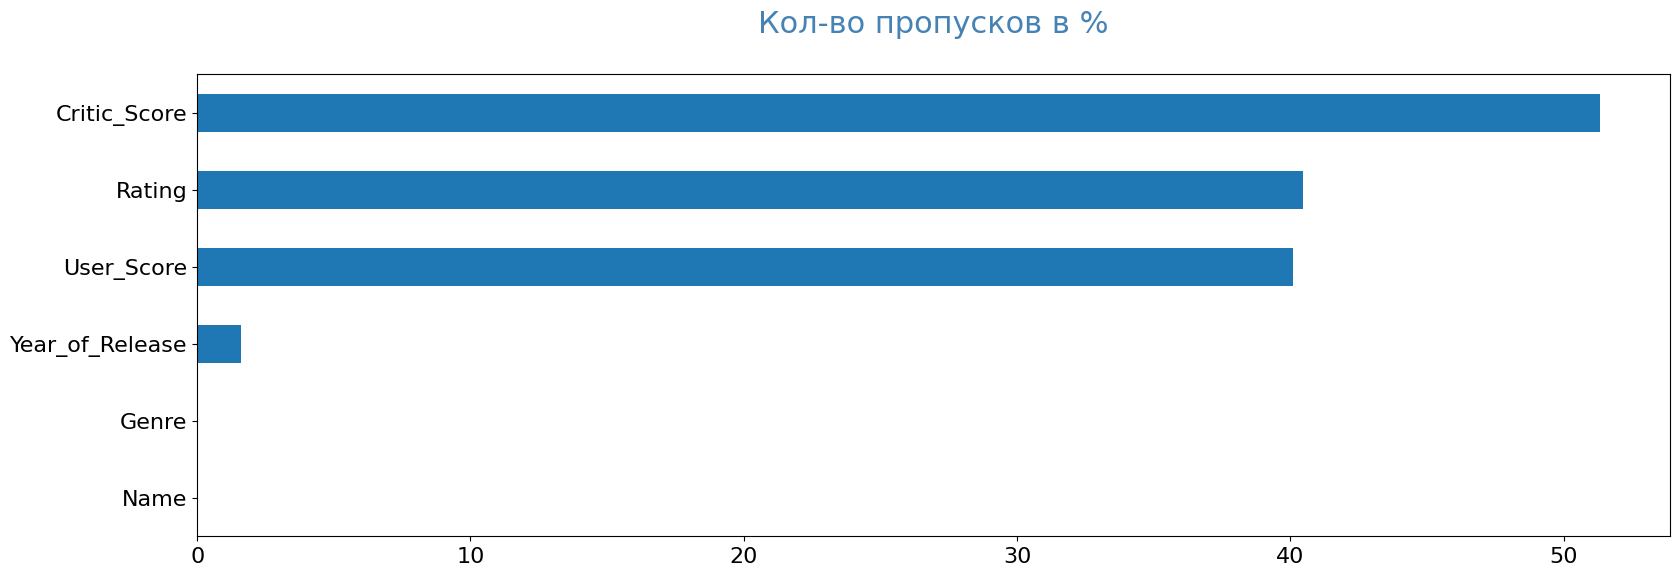

In [8]:
pass_value_barh(games)

Больше всего пропусков в оценках критиков - более 50%. Так же большой процент прупусков в графе рейтинг и оценки пользователей

In [9]:
games.duplicated().sum() #проверка на явные дублткаты

0

In [10]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Видим что максимальные значения в колонках с кол-вом проданых копий сильно отличаются от средних. Скорее всего это немногие игры "бестселлеры", проданные огромными тиражами

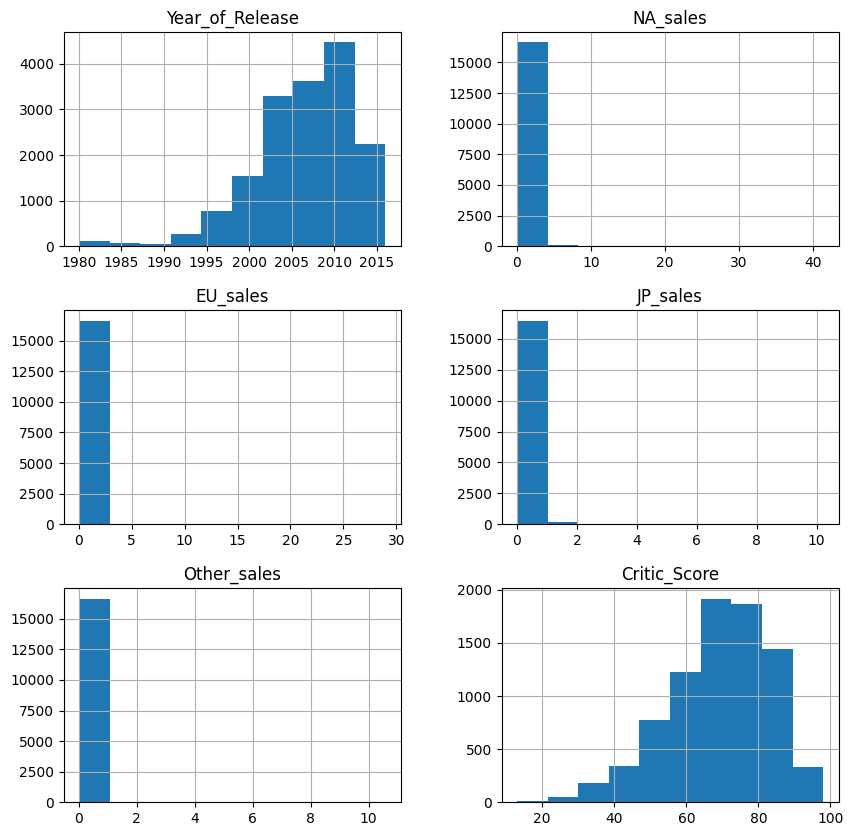

In [11]:
games.hist(figsize=(10, 10));

## Предобработка данных

### Названия столбцов

Удобнее привести все названия столбцов к нижнему регистру

In [12]:
games.columns = games.columns.str.lower()

In [13]:
games.rename({'rating' : 'rating_type'}, axis=1, inplace=True)

In [14]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Тип данных

#### Год выпуска

In [15]:
games.year_of_release = round(games.year_of_release,0).astype('Int64')

In [16]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Оценка пользователей

In [17]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В уникальных значениях видиим множество разных оценок, Nan (пропуски в данных) и tbd.

**tbd** - (*To Be Determined, то есть "Будет определено"*). Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется.

Получается по смыслу для нас нет разницы оценки просто нет или ее нет сейчас, но она ожидается в будущем. Можем поменять tbd на Nan.
Так же поменяем тип данных с object на float

In [18]:
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')

In [19]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating_type      9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Типы данных во всех колонках устраивают, переходим к проверкам пропусков в данных

### Обработка пропусков

Еще раз посмотрим на кол-во пропусков в столбцах

In [21]:
games.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating_type        6766
dtype: int64

####  Название и Жанр

In [22]:
games.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что строки с пропусками в названии и жанре совпадают. Не понятно, что это за игры. Для анализа не представляют интерес - удаляем. Тем более таких всего 2 строки.

In [23]:
games = games.dropna(subset=['name'])

In [24]:
games.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

На всякий случай посмотрим уникальные значения, чтобы убедиться, что нет неявных дубликатов в наименовании жанров.
Их нет.

#### Год публикации

In [25]:
games.year_of_release.isna().sum()

269

In [26]:
games[games.year_of_release.isna()]['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

In [27]:
games[games.year_of_release.isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Видим, что у некоторых игр в названии прописан год. Но насколько целесообразно пытаться вытащить его? Добавление десятка строк вряд ли сильно повлияет на исследование. Точно так же, в теории можно по названию узнать год выпуски и заполнить вручную. Но это слишком трудоемко. Оставляем пропуски.

#### Рейтинг

In [28]:
games.rating_type.unique() #смотрим уникальные значения

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Entertainment Software Rating Board - организация выставляющая рейтинг. Работает с 1994 года. 
Возможные рейтинги:
* **AO** (*1994–настоящее время*) - только для взрослых
* **М** (*1994–настоящее время*) - для детей от 17 лет и старше
* **T** (*1994–настоящее время*) - для детей от 13 лет и старше
* **E10+** (*2005–настоящее время*) - для детей старше 10 лет
* **E** (*1994-1998 (как **K-A**), 1998–настоящее время (как **E**)*) - для всех возрастов
* **EC** (*1994–2018*) - ориентированный на аудиторию дошкольного возраста. Этот рейтинг был признан устаревшим в 2018 году из-за редкости использования.
* **RP** (*1994–настоящее время*) - используется в рекламных материалах для игр, которым ESRB еще не присвоил окончательный рейтинг


Таким образом получаем, что **К-А** и **E** - можно привести к одному виду. Это может быть полезно для более точной оценки прибыльности по жанрам.

In [29]:
games.loc[games.rating_type == 'K-A', 'rating_type'] = 'E'

In [30]:
games.rating_type.unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Посмотрим строки с пропусками

In [31]:
games.query('rating_type.isna()').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Проверим у каких игр не проставлен рейтинг. Возможно это будут игры, вышедшие до 1994 года, когда организации еще не было.

In [32]:
games.rating_type.isna().sum() #кол-во прупусков

6764

In [33]:
games.query('rating_type.isna() & year_of_release < 1994')['year_of_release'].count() 
#Кол-во игр, выпущенных до создания организации

361

In [34]:
games.query('rating_type.isna() & year_of_release >= 1994')['year_of_release'].count()
#Кол-во игр, выпущенных до создания организации

6315

Большинство игр с пропущенными значениями вышли уже во время работы организации. По каким причинам возникли пропуски не известно. Может быть ошибка выгрузки данных, может этим играм не проставили рейтинг 


В данных так же есть игры с рейтингом RP, что означает, что у игры пока еще не просатвлен рейтинг от организации. Но она уже отправлена на проверку. Для нас при анализе проддаж по рейтингу игр эти значения будут равнозначными. Можем привести к едимому виду. Т.к. у нас тип object, заменим на строковое значение.

In [35]:
games.loc[games.rating_type == 'RP', 'rating_type'] = 'unknown'
games.loc[games.rating_type.isna(), 'rating_type'] = 'unknown'

In [36]:
games.rating_type.isna().sum()

0

### 2.4. Подсчет суммарных продаж

In [37]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [38]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [39]:
# check 
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating_type      16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


## Исследовательский анализ

### Кол-во игр, выпущенных в разные года <a id='total_sales'></a>

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

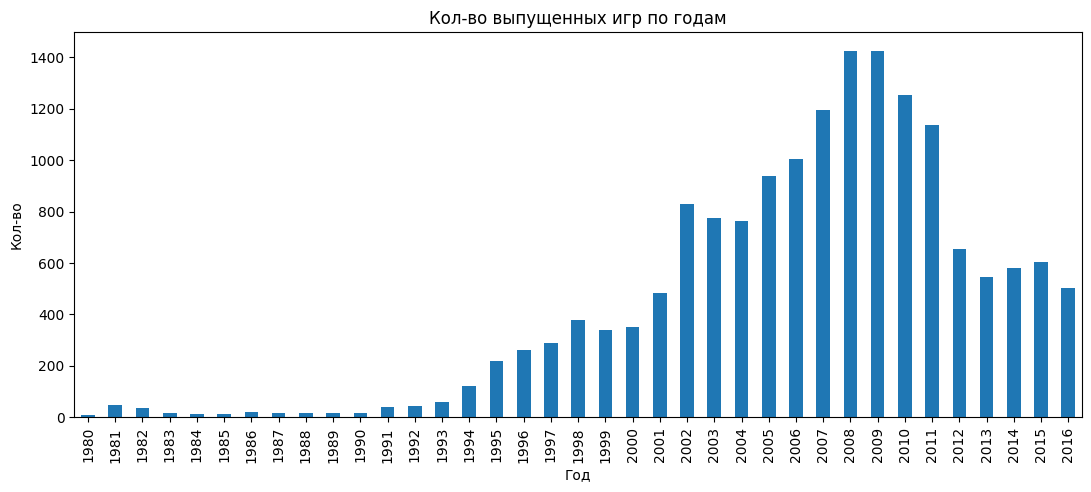

In [44]:
games.groupby('year_of_release')['name']\
.count().reset_index().plot(kind = 'bar', x='year_of_release', y= 'name', legend=False, figsize  = (13,5))
plt.title('Кол-во выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во');

**Вывод:**
Видим очень маленкое кол-во игр в 1980х и до середины 90х годов. Все логично, технологии еще не сильно развиты и доступность игр на плохом уровне. Потом начинается рост. Пик выпуска игр приходится на 2008-2009 год. После 2011 года видим снижение кол-ва выпущенных игр. Можно сказать, что с 2012 года идет кризисная полоса в игровой индустрии.

### Изменение продаж по платформам
**Задание:** Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [45]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [46]:
games.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [47]:
# Отсортируем платформы по суммарным продажам
top_platform_for_sales = (games 
    .groupby('platform') 
    .agg({'total_sales':'sum'}) 
    .reset_index().sort_values(by='total_sales', ascending=False)
                         )
#display(top_platform_for_sales.T)
#pd.set_option('display.max_rows', None) 
top_platform_for_sales

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


Видим 6 лидирующих платформ: PS2, X360, PS3, Wii, DS, PS

In [48]:
top_platform = []
for t in top_platform_for_sales[top_platform_for_sales.total_sales > 700]['platform']:
    top_platform.append(t)
top_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [49]:
platform_sales = (games
                  .query('platform in @top_platform')
                  .groupby(['platform','year_of_release'])
                  .agg({'total_sales': 'sum'}).reset_index()
                 )

In [50]:
platform_sales.tail(10)

,platform,year_of_release,total_sales
57,X360,2007,95.41
58,X360,2008,135.26
59,X360,2009,120.29
60,X360,2010,170.03
61,X360,2011,143.84
62,X360,2012,99.74
63,X360,2013,88.58
64,X360,2014,34.74
65,X360,2015,11.96
66,X360,2016,1.52


'PS2'

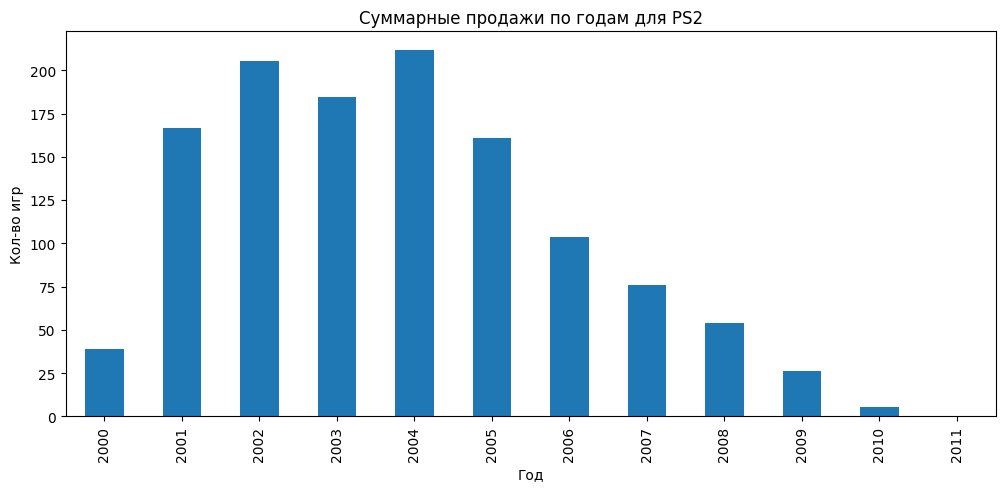

In [55]:
platform_sales[platform_sales.platform == top_platform[0]]\
.plot(kind = 'bar', x='year_of_release', y='total_sales', legend=False, figsize=(12, 5))
plt.title('Суммарные продажи по годам для PS2')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
top_platform[0]

Расцвет продаж игр на PS2 пришелся на 2002-2004 год. 

'X360'

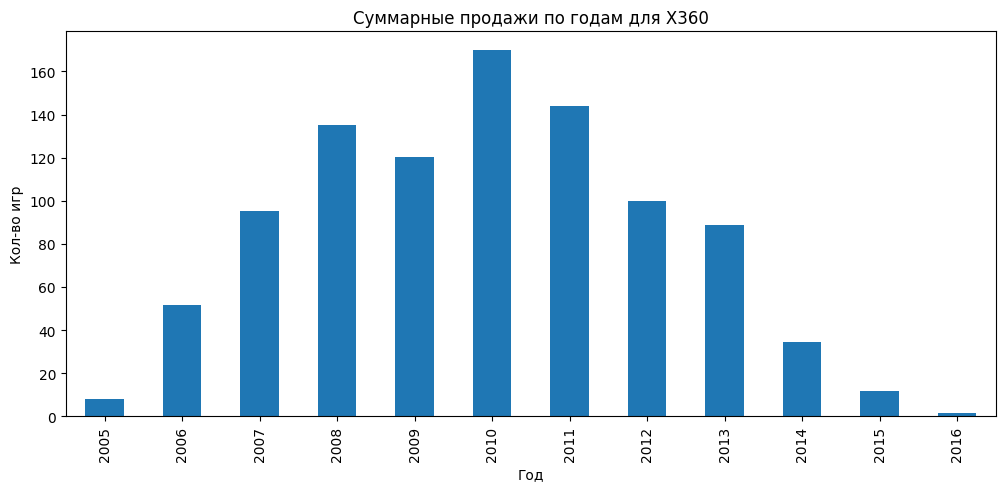

In [56]:
platform_sales[platform_sales.platform == top_platform[1]]\
.plot(kind ='bar', x='year_of_release', y='total_sales',legend=False, figsize=(12, 5))
plt.title('Суммарные продажи по годам для X360')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
top_platform[1]

Расцвет продаж игр на X360 пришелся на 2010 год. 

'PS3'

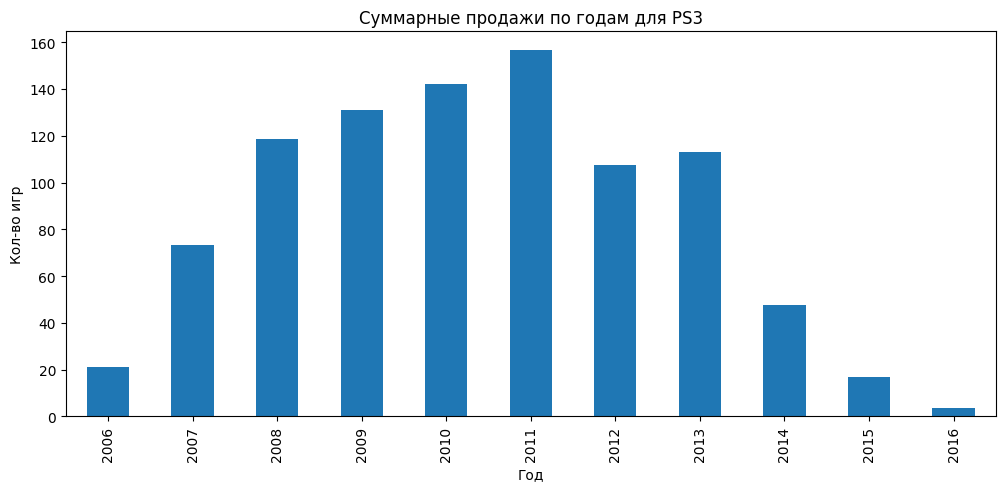

In [57]:
platform_sales[platform_sales.platform == top_platform[2]]\
.plot(kind ='bar', x='year_of_release', y='total_sales',legend=False, figsize=(12, 5))
plt.title('Суммарные продажи по годам для PS3')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
top_platform[2]

Расцвет продаж игр на PS3 пришелся на 2008-2011 года. 

'Wii'

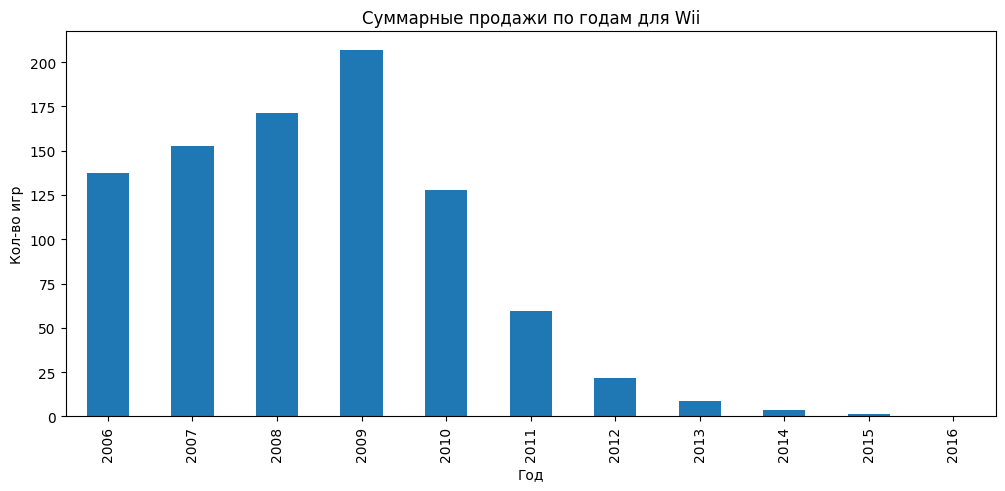

In [58]:
platform_sales[platform_sales.platform == top_platform[3]]\
.plot(kind ='bar', x='year_of_release', y='total_sales',legend=False, figsize=(12, 5))
plt.title('Суммарные продажи по годам для Wii')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
top_platform[3]

Расцвет продаж игр на Wii пришелся на 2009 год. 

'DS'

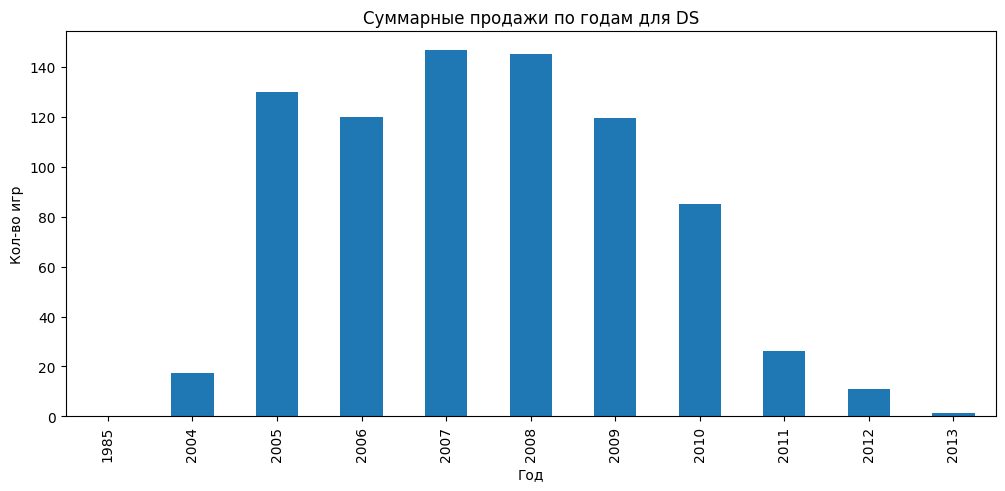

In [59]:
platform_sales[platform_sales.platform == top_platform[4]]\
.plot(kind ='bar', x='year_of_release', y='total_sales',legend=False, figsize=(12, 5))
plt.title('Суммарные продажи по годам для DS')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
top_platform[4]

Расцвет продаж игр на DS пришелся на 2007-2008 год. 

На графике видим странное значение 1985 год. Консоль была выпущена в 2004. Удалим выброс

In [60]:
games = games.drop(games[(games.platform == 'DS') & (games.year_of_release == 1985)].index)

'PS'

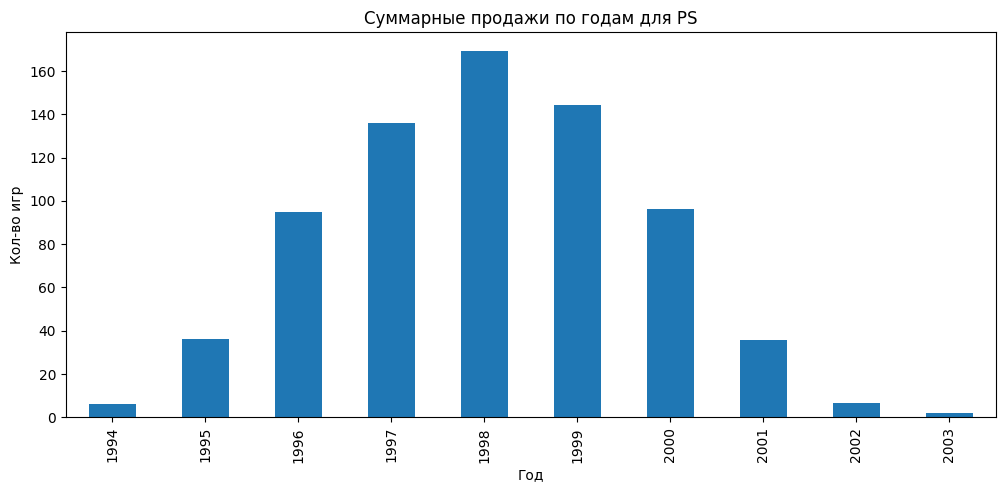

In [61]:
platform_sales[platform_sales.platform == top_platform[5]]\
.plot(kind ='bar', x='year_of_release', y='total_sales',legend=False, figsize=(12, 5))
plt.title('Суммарные продажи по годам для PS')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
top_platform[5]

Расцвет продаж игр на PS пришелся на 1997-1999 год. 

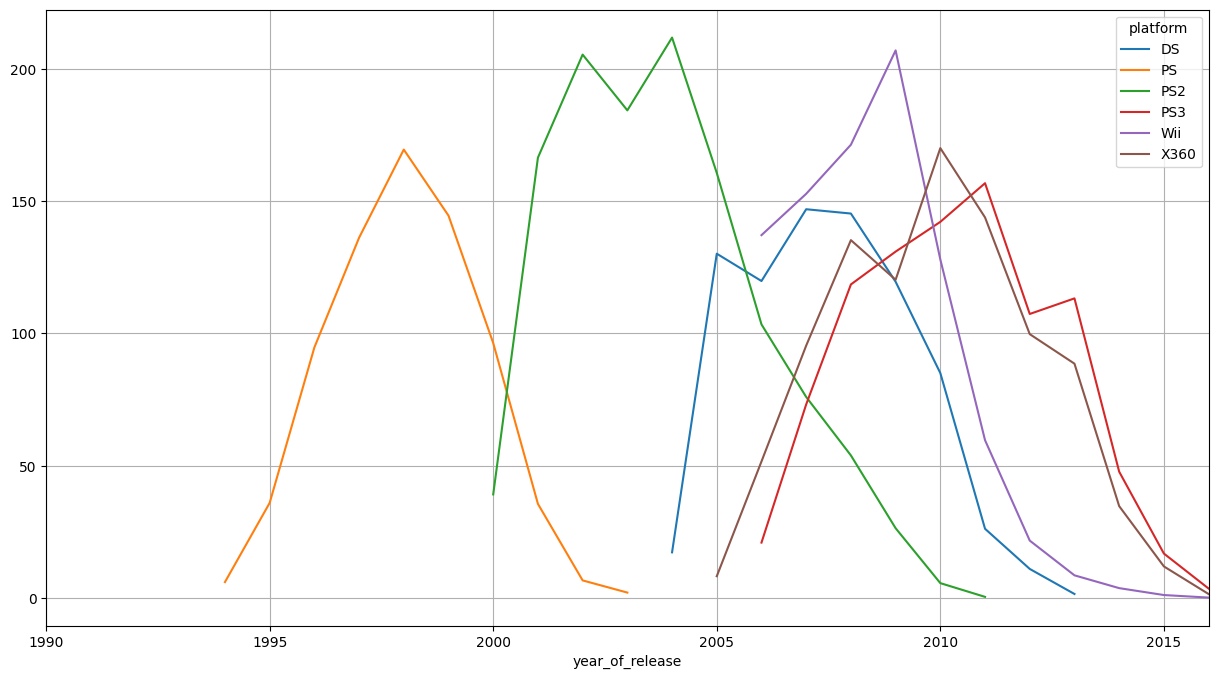

In [63]:
(
    games
    .query('platform in @top_platform')
    .pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
    .plot(figsize  = (15,8), grid=True)
       
)
plt.xlim(1990,2016);

**Вывод:** Для каждой из платформ игры выпускаются примерно 10-11 лет. Пик продаж игр приходится на 5-6 год.

### Какие платформы лидируют по продажам, растут или падают?

**Задание:** Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Как мы видели на первом [графике](#total_sales) по продажам за каждый год c 2012 года продажи игр упали и держатся на примерно на одном уровне. Для дальшейшего исследования возьмем автуальные данные за последние 2,5 года (с 2014 по неполный 2016 год)

In [64]:
good_data_games = games[games.year_of_release >= 2014]

In [65]:
good_data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating_type      1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 173.2+ KB


In [66]:
good_data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98


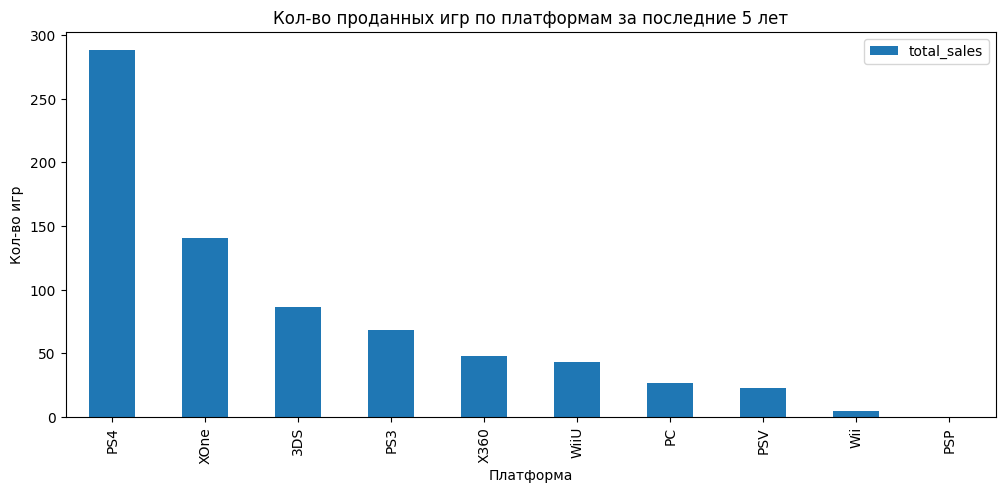

In [68]:
(
    good_data_games
    .pivot_table(index='platform', values = 'total_sales', aggfunc = 'sum')
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', x='platform', y='total_sales', figsize=(12, 5))
)
plt.title('Кол-во проданных игр по платформам за последние 5 лет')
plt.xlabel('Платформа')
plt.ylabel('Кол-во игр');

Видим явного лидера продаж последних лет - PS4 от компании Sony. Далее идет XOne от Microsoft и портативная консоль 3DS от Nintendo. Портативные мини консоли PSP и DS практически забыты. Их заменили белее производительные смартфоны.

Построим график, чтобы посмотреть в динамике по годам продажи игр на каждую из консолей. 

In [69]:
good_data_games.pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


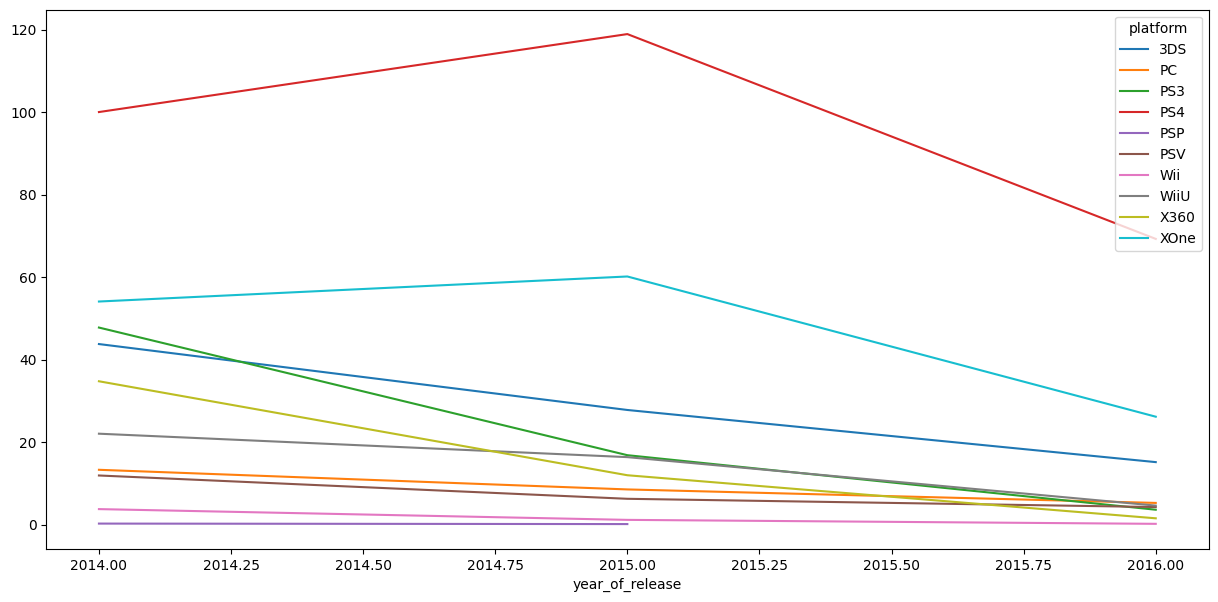

In [72]:
(
    good_data_games
    .pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
    .plot(figsize  = (15,7))

);

Четко видим на графике только 2 платформы в растущем тренде - PS4 и XOne. Игры на них начали выпускать только в 2013 году. Значит у них самый большой потенциал роста продаж в ближайшие несколько лет, ведь мы уже знаем, что пик продаж приходится примерно на 5-6 год, а срок "жизни" около 10 лет.
Снижение продаж в 2016 году скорее всего обусловлено тем, что 2016 год еще не закончился и мы пока не видим полной картины по нему.

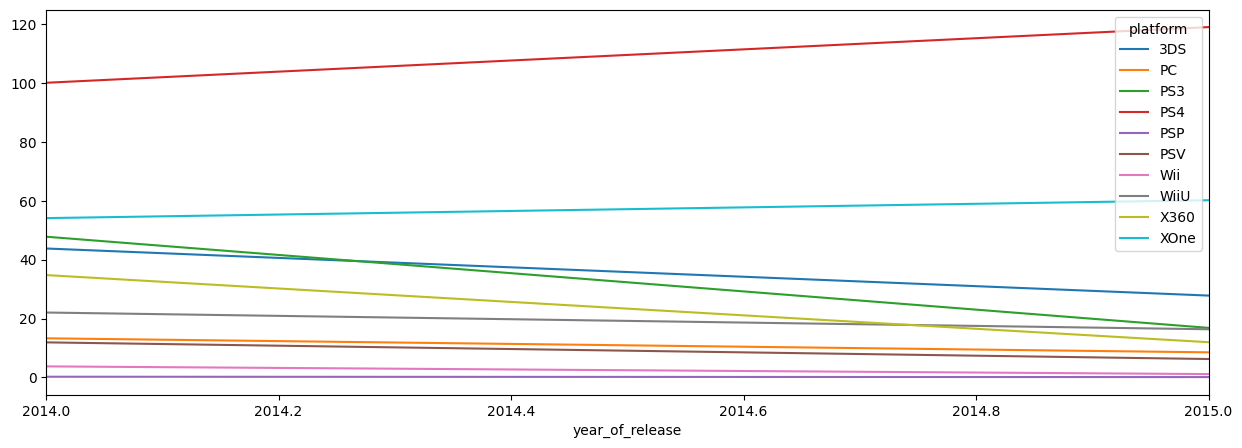

In [74]:
(
    good_data_games
    .pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
    .plot(figsize  = (15,5))

)
plt.xlim(2014,2015);

Все остальные платформы находятся в падающем тренде. Однако 3DS показывает не такое резкое снижение, как например теряющие актуальность PS3 и X360 (прошлые поколения консолей). Объем продаж за прошлый год по 3DS держится около 30 млн копий игр, что довольно много. Эта платформа явно имеет свою аудиторию.

Построим отдельные графики продаж для этих платформ


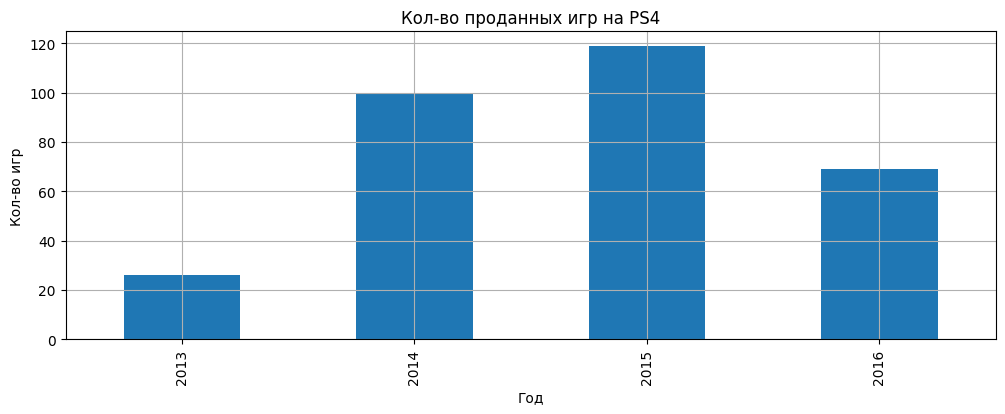

In [77]:
(
    games[games.platform == 'PS4']
    .pivot_table(index='year_of_release', values = 'total_sales', aggfunc = 'sum')
    .reset_index()
    .plot(kind = 'bar', x='year_of_release', y='total_sales',legend=False, grid=True, figsize=(12, 4)) 
)
plt.title('Кол-во проданных игр на PS4')
plt.xlabel('Год')
plt.ylabel('Кол-во игр');

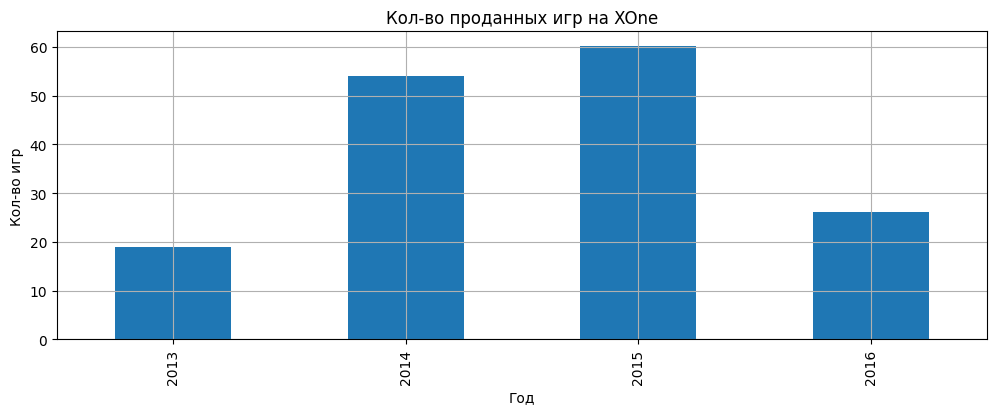

In [79]:
(
    games[games.platform == 'XOne']
    .pivot_table(index='year_of_release', values = 'total_sales', aggfunc = 'sum')
    .reset_index()
    .plot(kind = 'bar', x='year_of_release', y='total_sales',legend=False, grid=True, figsize=(12, 4)) 
)
plt.title('Кол-во проданных игр на XOne')
plt.xlabel('Год')
plt.ylabel('Кол-во игр');

In [80]:
PS4 = (
    games[games.platform == 'PS4']
    .pivot_table(index='year_of_release', values = 'total_sales', aggfunc = 'sum')
    )

XOne = (
    games[games.platform == 'XOne']
    .pivot_table(index='year_of_release', values = 'total_sales', aggfunc = 'sum')
        
)

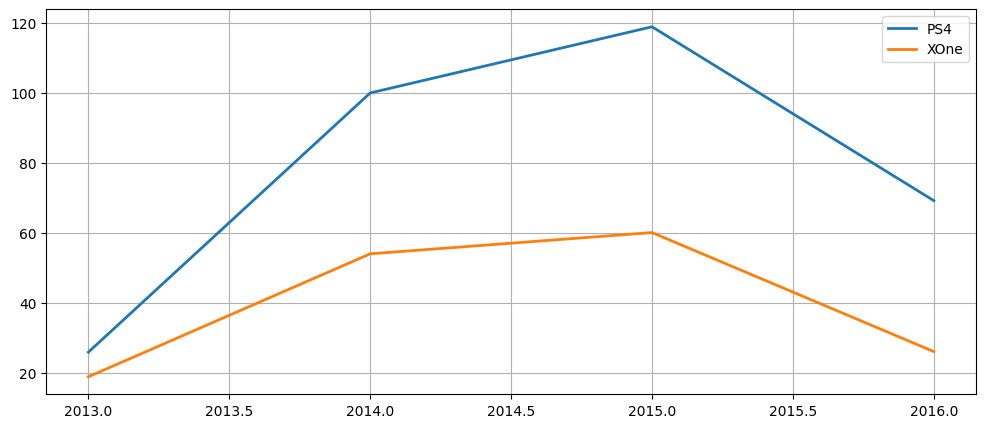

In [83]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(PS4['total_sales'], linewidth = 2)
ax.grid(True)
ax.plot(XOne['total_sales'], linewidth = 2)
ax.grid(True)
ax.legend(['PS4', 'XOne']);

Так же можно сказать, что если сравнивать объемы продаж 2х перспективных платформ, за прошедшие года лидирует PS4. За 2014-2015 год они продали почти вдвое больше игр, чем XOne.

### Глобальные продажи игр в разбивке по платформам

**Задание:** Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [84]:
good_data_games.groupby('platform')['total_sales'].describe().T

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,212.000000,151.000000,219.000000,376.000000,13.000000,295.000000,11.000000,73.000000,111.000000,228.000000
mean,0.408868,0.179139,0.311324,0.766356,0.027692,0.075932,0.460909,0.588767,0.434414,0.615614
std,1.188368,0.329359,0.633059,1.614969,0.027735,0.141591,0.625451,1.161467,0.628967,1.046513
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.030000,0.020000,0.040000,0.057500,0.010000,0.020000,0.035000,0.050000,0.070000,0.050000
50%,0.090000,0.060000,0.110000,0.185000,0.020000,0.040000,0.180000,0.190000,0.180000,0.205000
75%,0.250000,0.200000,0.325000,0.690000,0.020000,0.090000,0.755000,0.570000,0.505000,0.632500
max,11.680000,3.050000,5.270000,14.630000,0.090000,1.960000,2.010000,7.090000,4.280000,7.390000


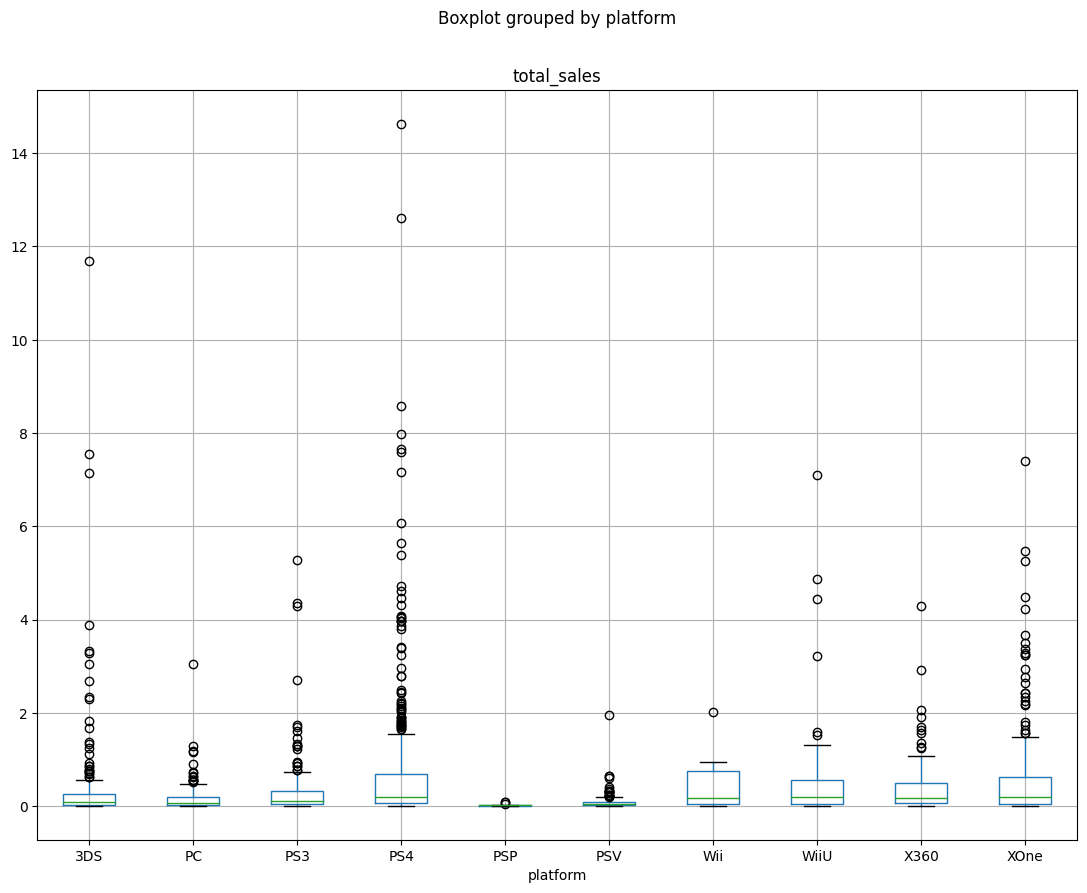

In [88]:
good_data_games.boxplot('total_sales', by='platform', figsize=(13,10));

Видим, что в игровой индустрии на каждой платформе есть бестселлеры, проданные миллионными тиражами, тогда как в большистве своем игры расходятся сильно меньшими тиражами. Можно посмотреть ближе на игры с продажами до 2 млн копий

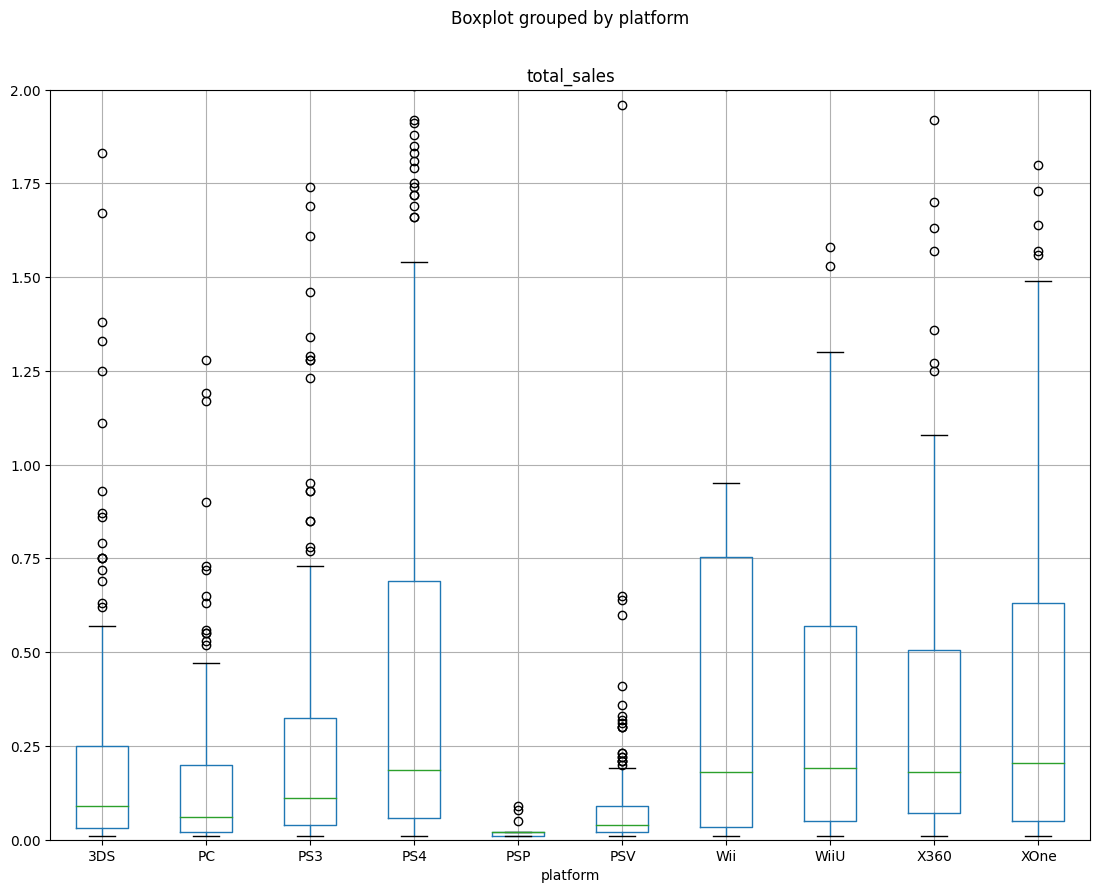

In [90]:
good_data_games.boxplot('total_sales', by='platform', figsize=(13,10)).set_ylim(0,2);

**ВЫВОД:** За последние 2,5 года:
* PSP - на ней продано наименьшее кол-во игр. Консоль уходит в закат. Нет ни одной игры, проданной более 200 тыс копий
* XOne - судя по самой большой медиане - в среднем игра на этой платформе продается бОльшим тиражом, чем на остальных.
* В продажах игр на PS4 самая большая дисперсия, видим много значений за границами усов - игр бестселлеров с необычно высокими продажами тут больше всего.


### Корреляция между отзывами и продажами

**Задание:** Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.

#### Корреляция с оценками критиков

##### Все платформы

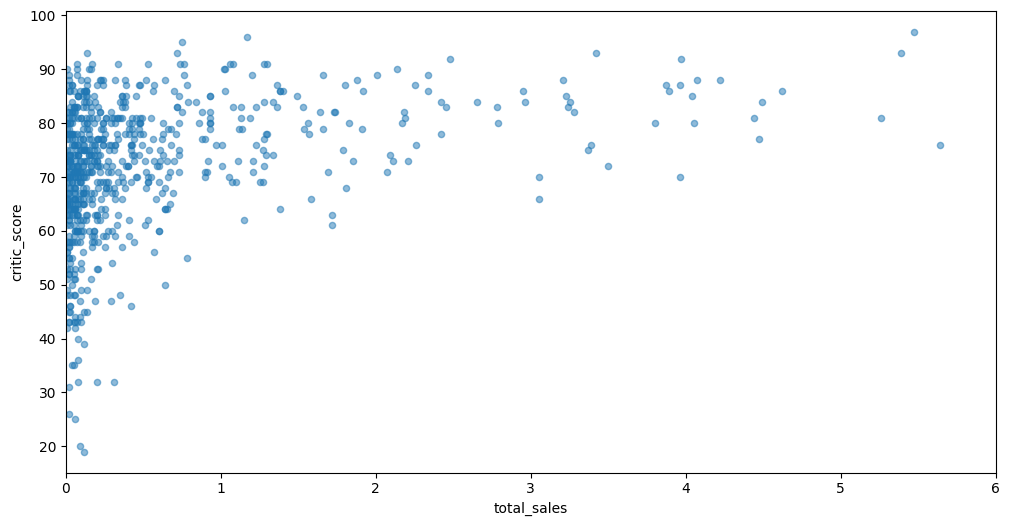

In [91]:
good_data_games.plot(kind='scatter', x= 'total_sales', y='critic_score', figsize = (12,6), alpha = 0.5)
plt.xlim(0,6); 

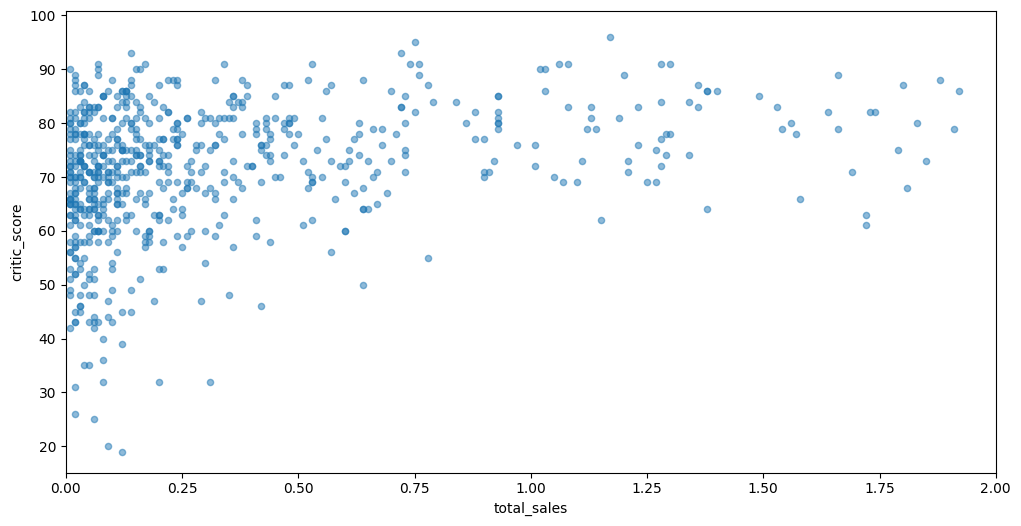

In [92]:
good_data_games.plot(kind='scatter', x= 'total_sales', y='critic_score', figsize = (12,6), alpha = 0.5)
plt.xlim(0,2); 

In [93]:
corr = good_data_games[['total_sales',\
            'user_score',\
            'critic_score']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,total_sales,user_score,critic_score
total_sales,1.00,-0.01,0.33
user_score,-0.01,1.00,0.50
critic_score,0.33,0.50,1.00


Есть небольшая корреляции между оценками критиков и кол-вом проданных копий.  
Можно сказать, что у игр с большим кол-вом проданных копий оценки достаточно высокие (от 60-65 до 99)
Однако на играх с меньшими тиражами (до 2 млн) зависимость становится слабее.

##### PS4 и оценки критиков

Посмотрим зависимость оценок критоков и продаж внутри одной из популярных платформ - PS4

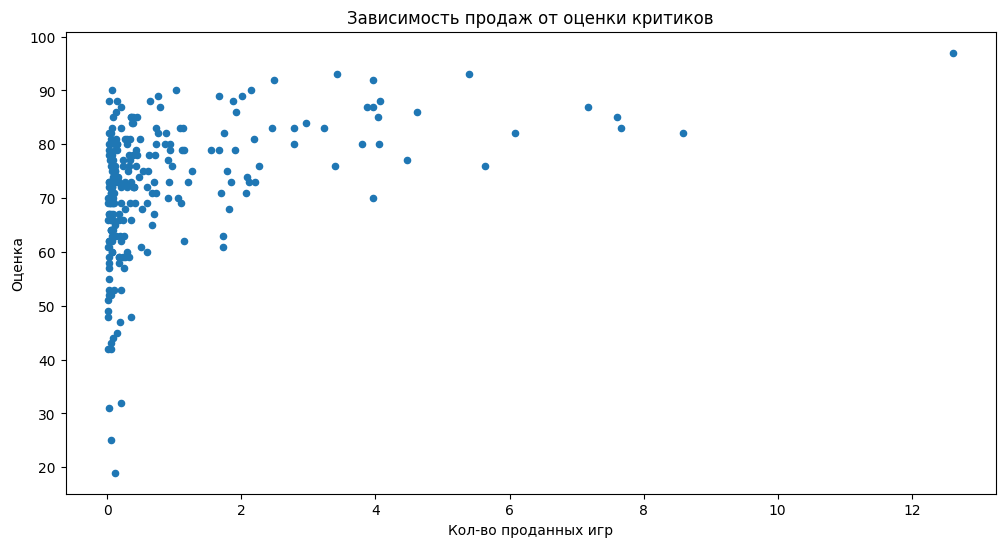

In [94]:
good_data_games[good_data_games.platform == 'PS4'].plot(kind='scatter', x= 'total_sales', y='critic_score', figsize = (12,6))
plt.title('Зависимость продаж от оценки критиков')
plt.xlabel('Кол-во проданных игр')
plt.ylabel('Оценка');

При рассмотрении игр внутри одной платформы, видим похожее распределение. У высокотиражных игр оценки выше 65. 
На низких тиражах оценки могут быть любые.
В целом критики чаще оценивают игры выше 40 баллов. Игр с оценкой ниже этого уровня достаточно мало

##### XOne и оценки критиков

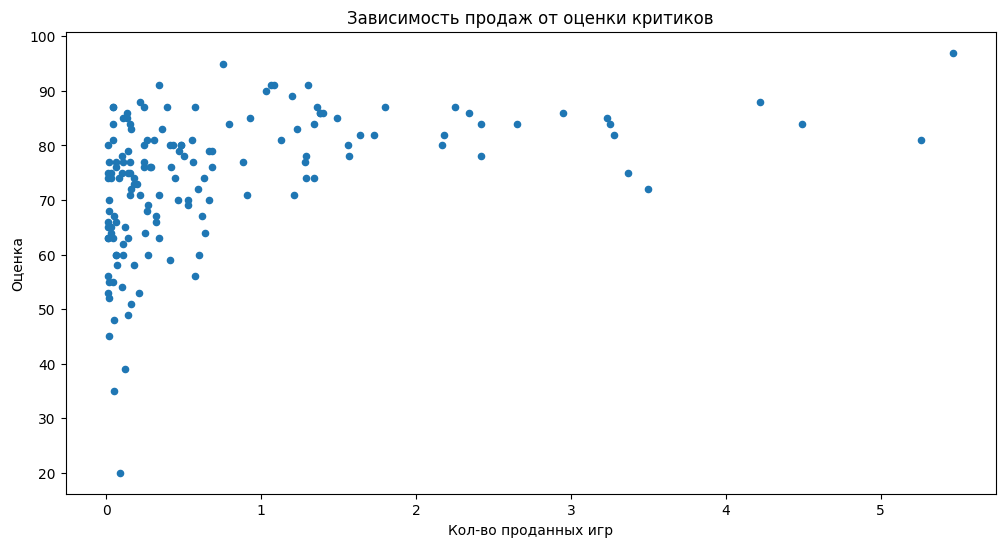

In [95]:
good_data_games[good_data_games.platform == 'XOne'].plot(kind='scatter', x= 'total_sales', y='critic_score', figsize = (12,6))
plt.title('Зависимость продаж от оценки критиков')
plt.xlabel('Кол-во проданных игр')
plt.ylabel('Оценка');

Картина похожа на PS4 - у малотиражных игр могут быть любые оценки, но высокотиражных игр с оценками ниже среднего нет.

##### 3DS и оценки критиков

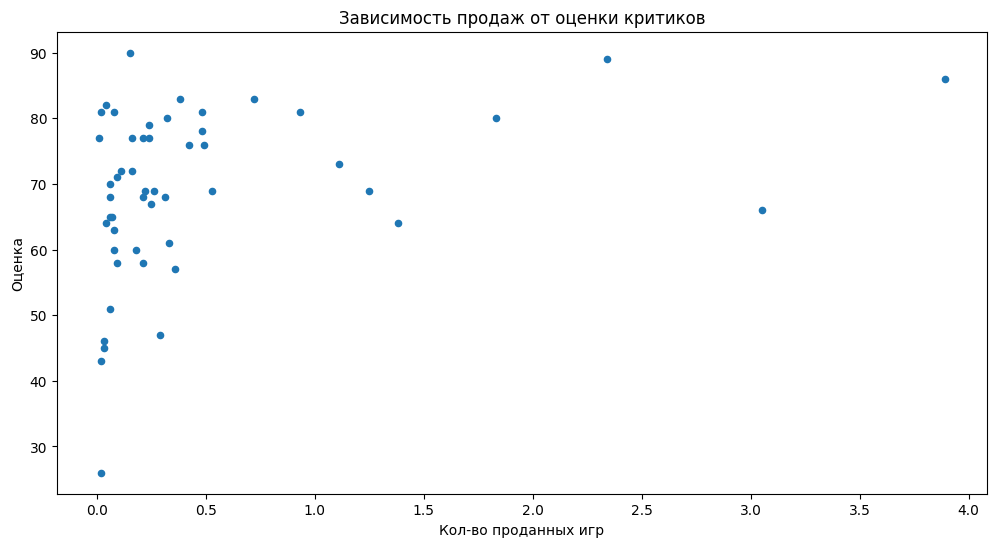

In [96]:
good_data_games[good_data_games.platform == '3DS'].plot(kind='scatter', x= 'total_sales', y='critic_score', figsize = (12,6))
plt.title('Зависимость продаж от оценки критиков')
plt.xlabel('Кол-во проданных игр')
plt.ylabel('Оценка');

Игр с оценками на 3DS меньше и диаграмма рассеяния более редкая. Критики смелее ставят более низкие оценки. Зависимость все так же не очень сильная

#### Корреляция с оценками пользователей

##### Все платформы и оценки пользователей

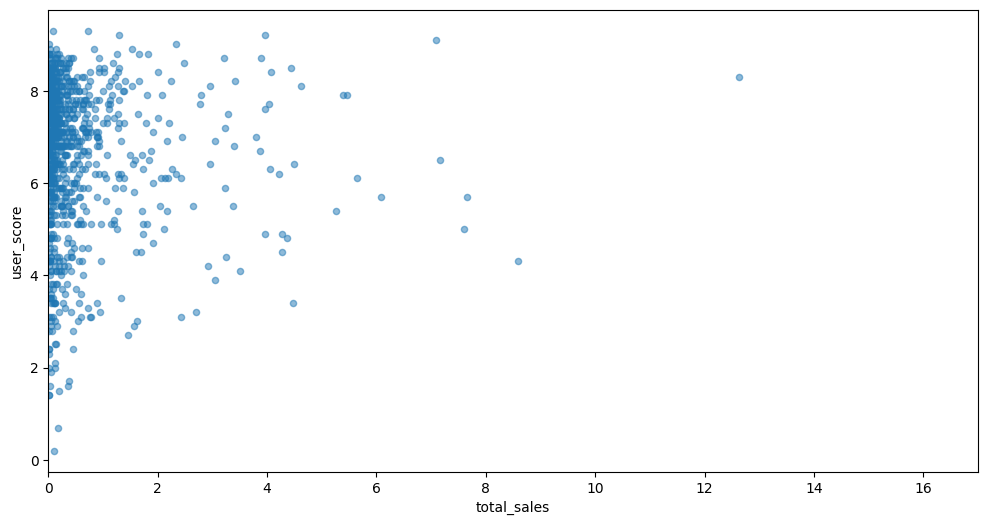

In [97]:
good_data_games.plot(kind='scatter', x= 'total_sales', y='user_score', figsize = (12,6), alpha = 0.5)
plt.xlim(0,17); 

Видим похожую картину на предыдущий график с корреляцией с оценками критиков. Однако пользователи чаще могут ставить низкие оценки играм с большими продажами.

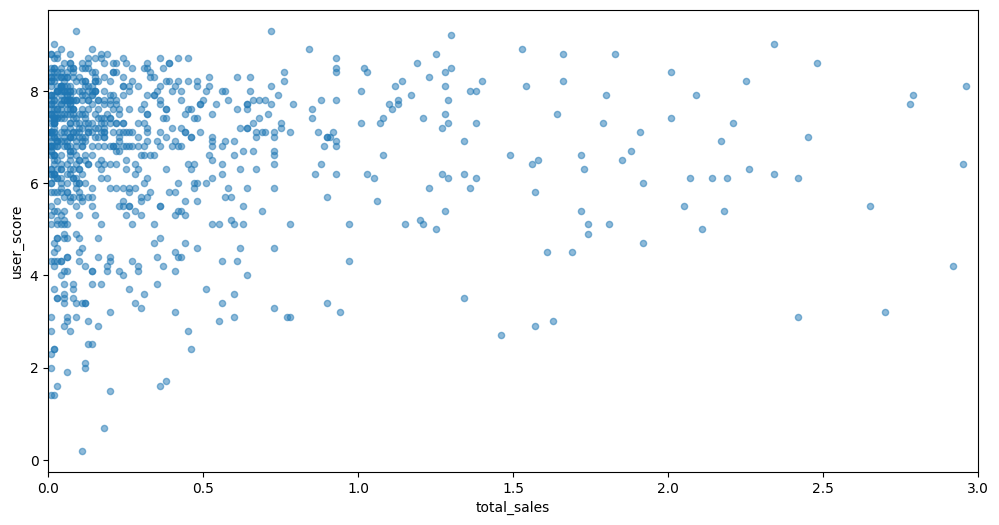

In [98]:
good_data_games.plot(kind='scatter', x= 'total_sales', y='user_score', figsize = (12,6), alpha = 0.5)
plt.xlim(0,3); 

На играх с тиражом меньше 3 млн копий корреляция отсутствует

##### PS4 и оценки пользователей

Посмотрим так же оценки внутри одной платфоры

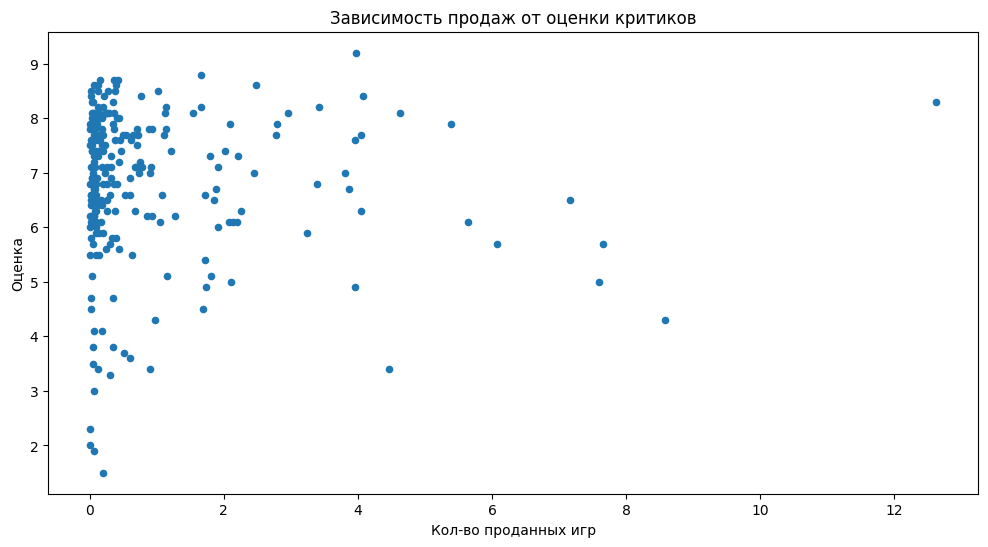

In [99]:
good_data_games[good_data_games.platform == 'PS4'].plot(kind='scatter', x= 'total_sales', y='user_score', figsize = (12,6))
plt.title('Зависимость продаж от оценки критиков')
plt.xlabel('Кол-во проданных игр')
plt.ylabel('Оценка');

Похожая картина. Пользователи чаще критиков могут ставить низкие оценки играм с большими продажами. 
Зависимость между оценками пользователей и продажами сильно меньше, чем зависимость между оценками критиков и продажами

##### XOne и оценки пользователей

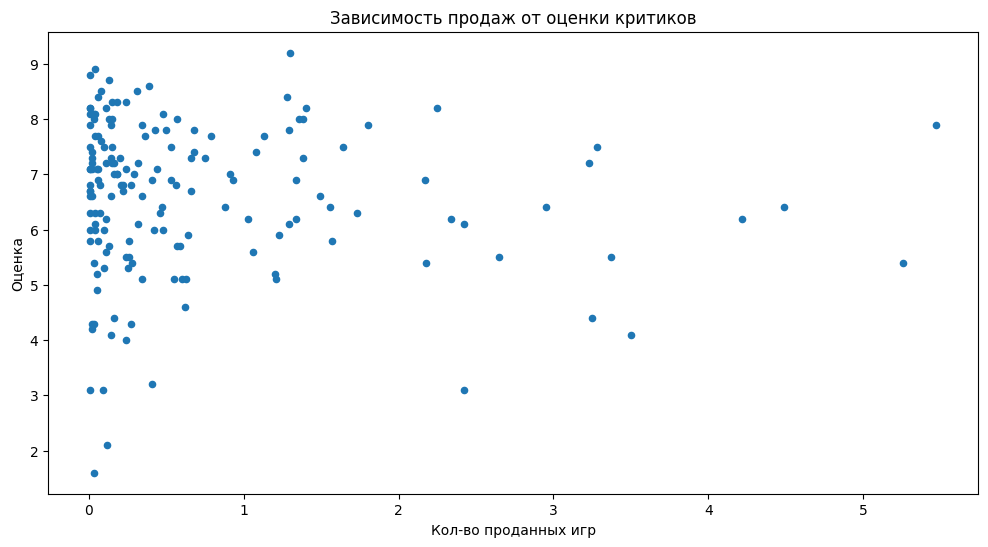

In [100]:
good_data_games[good_data_games.platform == 'XOne'].plot(kind='scatter', x= 'total_sales', y='user_score', figsize = (12,6))
plt.title('Зависимость продаж от оценки критиков')
plt.xlabel('Кол-во проданных игр')
plt.ylabel('Оценка');

Результаты по XOne почти ничем не отличаются. Разброс оценок даже возможно чуть больше. Пользователи так же смоло могут ставить не очень высокие оценки даже популярным играм

##### 3DS и оценки пользователей

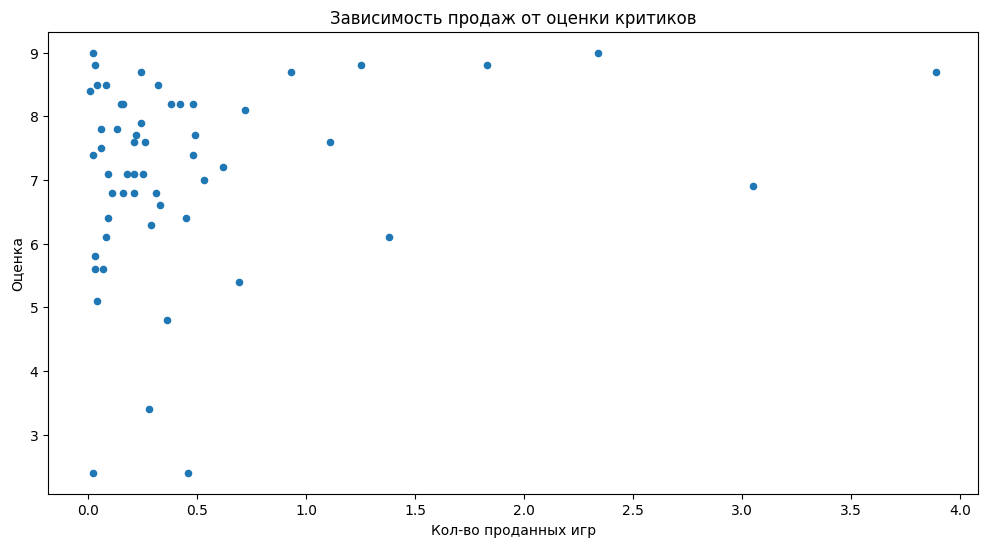

In [101]:
good_data_games[good_data_games.platform == '3DS'].plot(kind='scatter', x= 'total_sales', y='user_score', figsize = (12,6))
plt.title('Зависимость продаж от оценки критиков')
plt.xlabel('Кол-во проданных игр')
plt.ylabel('Оценка');

Для игр на платформе 3DS корреляция с оценками пользвателей судя по всему чуть выше. Прослеживается небольшая связь: чем популярнее игра, тем выше оценки

#### Таблицы корреляций

Для более точной оценки построим таблицы корреляций

In [102]:
corr = good_data_games[good_data_games.platform == 'PS4'][['total_sales',\
            'user_score',\
            'critic_score']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,total_sales,user_score,critic_score
total_sales,1.00,-0.04,0.40
user_score,-0.04,1.00,0.55
critic_score,0.40,0.55,1.00


In [103]:
corr = good_data_games[good_data_games.platform == 'XOne'][['total_sales',\
            'user_score',\
            'critic_score']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,total_sales,user_score,critic_score
total_sales,1.00,-0.07,0.43
user_score,-0.07,1.00,0.44
critic_score,0.43,0.44,1.00


In [104]:
corr = good_data_games[good_data_games.platform == '3DS'][['total_sales',\
            'user_score',\
            'critic_score']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,total_sales,user_score,critic_score
total_sales,1.00,0.22,0.31
user_score,0.22,1.00,0.86
critic_score,0.31,0.86,1.00


**ВЫВОД:** 
* Видим слабую корреляцию оценок критиков с суммарными продажами игр. Многие игры с высокими оценками проданы малым тиражом и так же встречаются игры со средними оценками, но проданный огромными тиражами в несколько миллионов.
 Однако почти все игры с большими тиражами имеют оценку критиков выше средней.


* Корреляции оценок пользователей и суммарных продаж прослеживается только на 3DS и то очень очень слабая. На остальных ее вообще нет. Делаем вывод, что оценки пользователей не влияют на продажи.


* Однако по таблице корреляций можно сказать, что есть средняя связь между оценками пользователей и оценками критиков. 
А по платформе 3DS она вообще очень сильная. Критики и пользователи часто солидарны в выборе оценки.



### Общее распределение игр по жанрам

**Задание:** Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [105]:
stat_game = (
    good_data_games
    .pivot_table(index='genre', values = 'total_sales', aggfunc = ['count', 'sum'])
    .reset_index()
    )
stat_game.columns = ['genre','count', 'sum_sales']

Сначала посмотрим общее кол-во выпущенных игр за 2,5 года в каждом жанре <a id='hist'></a>

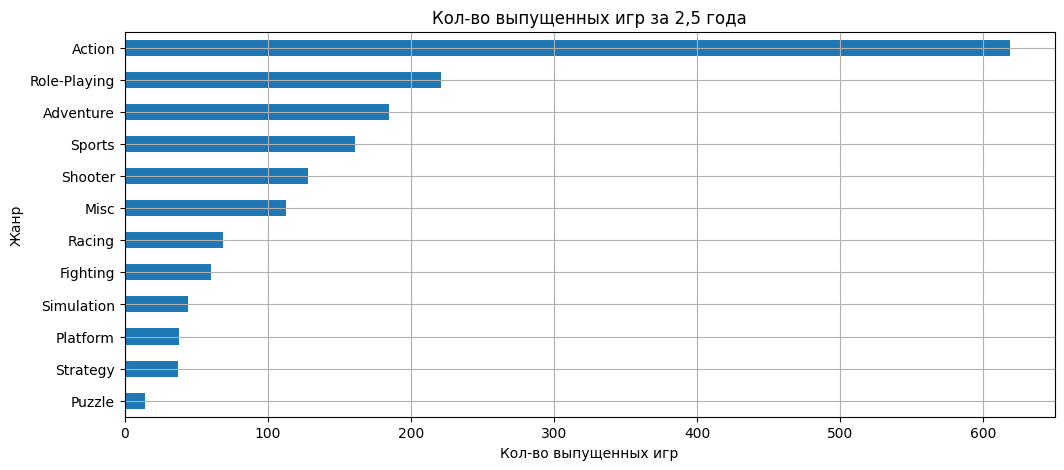

In [107]:
stat_game.sort_values(by='count').plot(kind = 'barh', x='genre', y='count', legend=False, grid=True, figsize=(12,5))
plt.title('Кол-во выпущенных игр за 2,5 года')
plt.xlabel('Кол-во выпущенных игр')
plt.ylabel('Жанр');

Больше всего игр за последние 2,5 года было выпущено в жанре - Action.\
На втором месте Role-Playing\
Аутсайдером стал Puzzle.

Теперь посмотрим на суммарные продажи каждого жанра

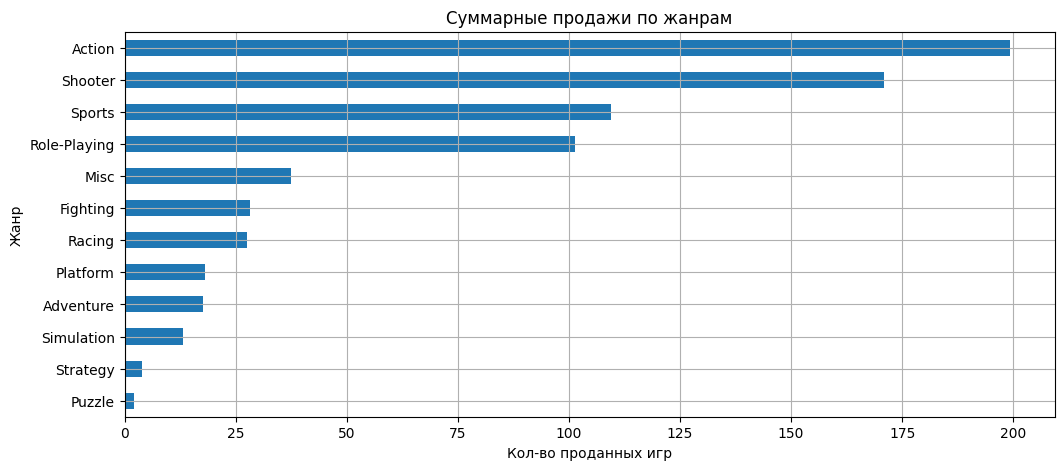

In [108]:
stat_game.sort_values(by='sum_sales').plot(kind = 'barh', x='genre', y='sum_sales', legend=False, grid=True, figsize=(12,5))
plt.title('Суммарные продажи по жанрам')
plt.xlabel('Кол-во проданных игр')
plt.ylabel('Жанр');

Суммарно за 2,5 года больше всего денег принес жанр Action\
Второе место Shooter\
Пазлы и Стратегии так же на последнем месте

Посмотрим как меняется прибыльность в зависимости от жанра на диаграмме размаха:

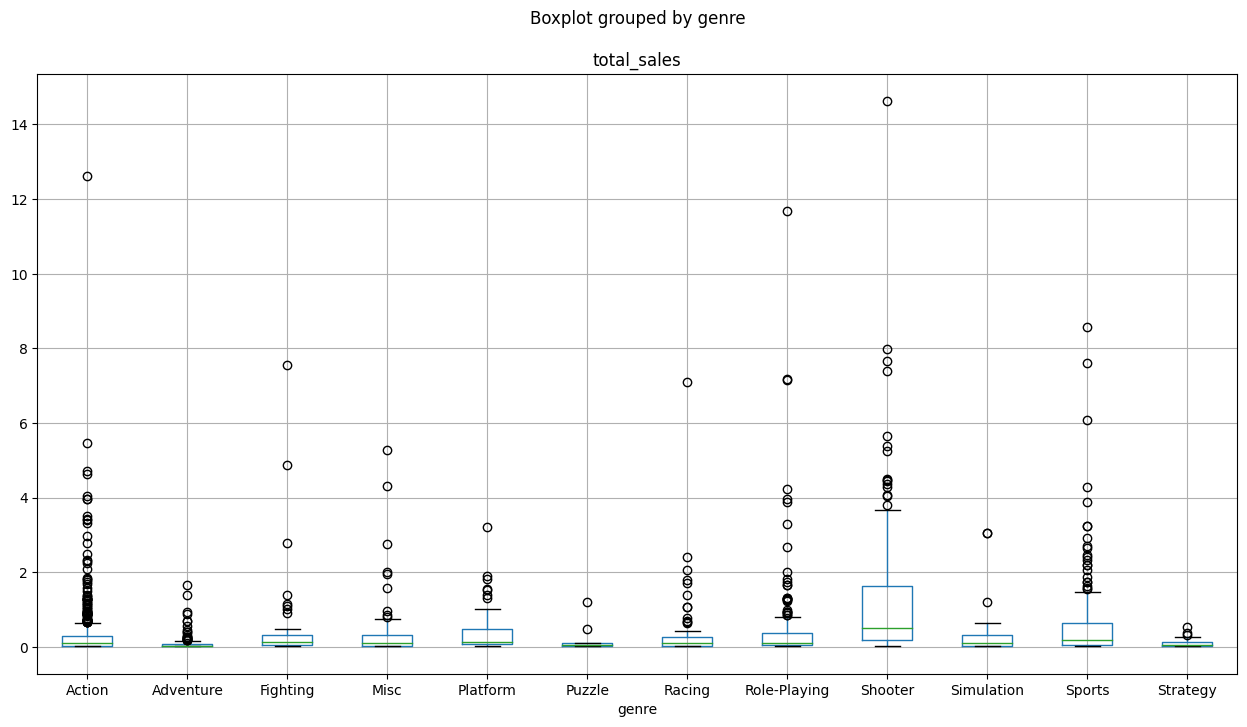

In [109]:
good_data_games.boxplot('total_sales', by='genre', figsize=(15,8));

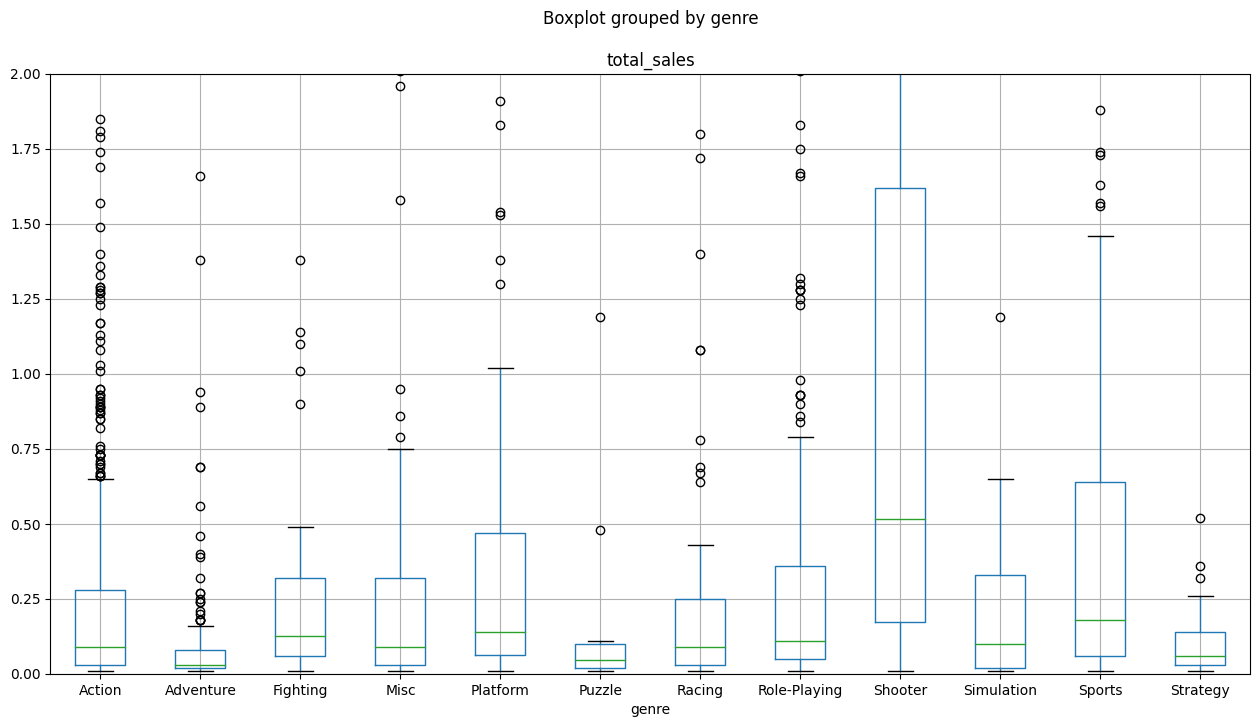

In [110]:
good_data_games.boxplot('total_sales', by='genre', figsize=(15,8)).set_ylim(0,2);

In [111]:
good_data_games.groupby('genre')['total_sales'].describe().T

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,619.000000,185.000000,60.000000,113.000000,38.000000,14.000000,69.000000,221.000000,128.000000,44.000000,161.000000,37.000000
mean,0.322068,0.094865,0.470333,0.332301,0.476053,0.157857,0.398841,0.459005,1.335469,0.298409,0.680000,0.107027
std,0.798181,0.203147,1.188053,0.736999,0.722561,0.320629,0.963716,1.177284,2.050567,0.646925,1.239736,0.118412
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.030000,0.020000,0.060000,0.030000,0.062500,0.020000,0.030000,0.050000,0.172500,0.020000,0.060000,0.030000
50%,0.090000,0.030000,0.125000,0.090000,0.140000,0.045000,0.090000,0.110000,0.515000,0.100000,0.180000,0.060000
75%,0.280000,0.080000,0.320000,0.320000,0.467500,0.100000,0.250000,0.360000,1.617500,0.327500,0.640000,0.140000
max,12.620000,1.660000,7.550000,5.270000,3.210000,1.190000,7.090000,11.680000,14.630000,3.050000,8.580000,0.520000


* Видим самое большое медианное значение продаж у рейтинга Shooter - 500 тыс копий. Половина всех игр имеет тираж в диапазоне от 200 тыс до 1,6 млн, что сильно больше, чем у конкурентов.

* Далее можно выделить жанр Спорт. Медиана чуть выше среднего - 180 тыс. И все таки около половины всех игр продаются тиражом больше этого значения.

* Игры в жанре Action имеют большой разброс в тиражах игр. Продажи большинства игр (примерно 75%) не превышают 280 тыс копий, однако в этом жанре много отдельных популярных игр. Судя по всему, самые большие суммарные продажи (которые мы видели на гистограмме выше) обусловлены огромным количественным преимуществом ([график](#hist))

* Медиана большинства жанров в районе 100-140тыс.

* Пазлы и Приключения в большинстве своем продаются плохо. Хоть в Приключениях и есть единичные довольно успешные игры

**Вывод:** 
Люди любят "стрелялки". Разработчики и продавцы игр с большей вероятностью заработают на этом жанре. \
На второе место можно постаивть Спортиные игры. В среднем они проддаются лучше оставшихся жанров \
Экшены берут количеством и отдельными успешными играми


## Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [112]:
good_data_games.sample(7)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type,total_sales
15991,Rugby World Cup 2015,PSV,2015,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,NaN,1.4,E,0.01
14483,Ebikore Photo Kano Kiss,PSV,2015,Action,0.00,0.00,0.03,0.00,NaN,NaN,unknown,0.03
5735,Sonic Boom: Rise of Lyric,WiiU,2014,Action,0.19,0.09,0.00,0.03,32.0,3.6,E10+,0.31
9188,Pro Yaky? Spirits 2014,PS3,2014,Sports,0.00,0.00,0.14,0.00,NaN,NaN,unknown,0.14
14222,Atelier Firis: The Alchemist of the Mysterious...,PS4,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,unknown,0.03
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


**NA_sales** — продажи в Северной Америке (миллионы проданных копий)\
**EU_sales** — продажи в Европе (миллионы проданных копий)\
**JP_sales** — продажи в Японии (миллионы проданных копий)

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [113]:
#функция для формирования топ-5 платформ по продажам и объединения остальных в одну группу 
def popular_platform(values):
    data = (
    good_data_games
    .pivot_table(index='platform', values = values , aggfunc = 'sum')
    .reset_index()
    .sort_values(by=values, ascending=False)
    .reset_index(drop=True)
    )
    other_sale = 0
    for sale in data.loc[5:, values]:
        other_sale += sale
    other_sale
    data = data.loc[:4]
    new_row = {'platform': 'Others', values : other_sale}
    data = data.append(new_row, ignore_index=True)
    return data
 

In [114]:
#сводные таблицы по регионам по топ 5 платформам
na_sales = popular_platform('na_sales')
eu_sales = popular_platform('eu_sales')
jp_sales = popular_platform('jp_sales')
display(na_sales)
display(eu_sales)
display(jp_sales)

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,Others,31.19


,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,Others,34.76


,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,Others,0.76


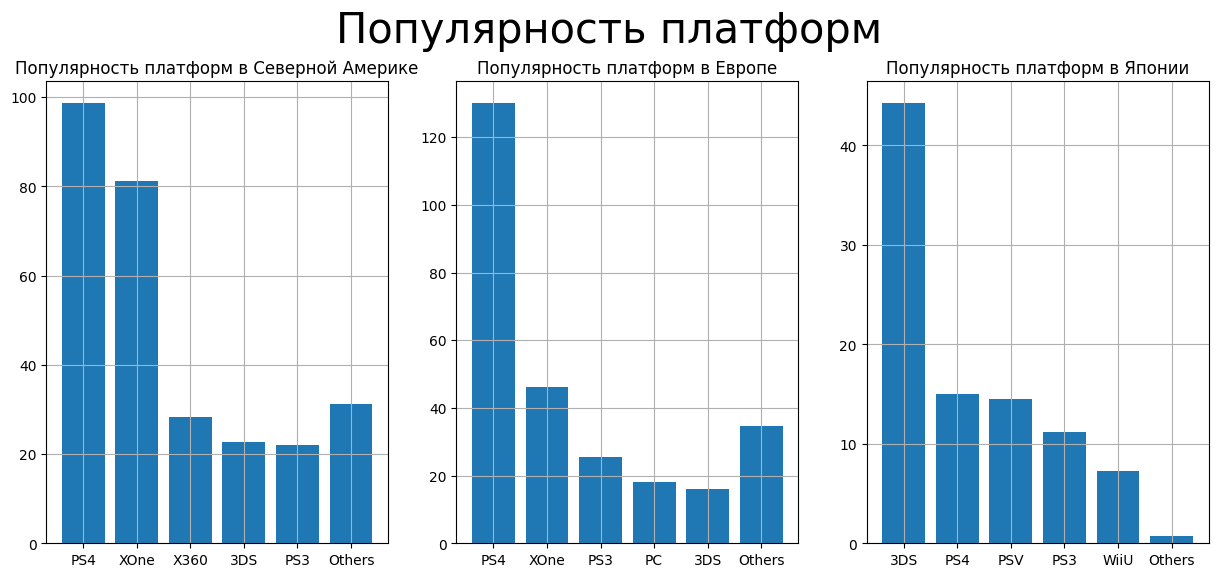

In [115]:
fig, (ax0,ax1,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
ax0.grid(True)
ax0.set_title('Популярность платформ в Северной Америке')
ax0.bar(na_sales['platform'], na_sales['na_sales'])
ax1.grid(True)
ax1.set_title('Популярность платформ в Европе')
ax1.bar(eu_sales['platform'], eu_sales['eu_sales'])
ax2.grid(True)
ax2.set_title('Популярность платформ в Японии')
ax2.bar(jp_sales['platform'], jp_sales['jp_sales'])
fig.suptitle('Популярность платформ',
             y = 1,
             fontsize = 30);

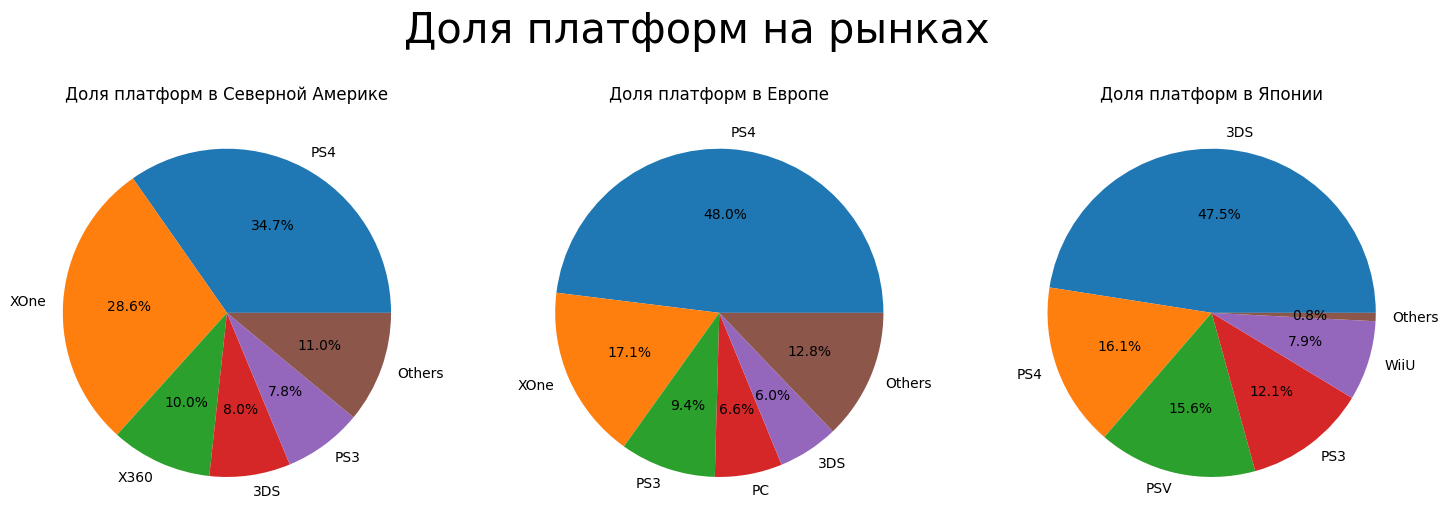

In [116]:
fig, (ax0,ax1,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
ax0.set_title('Доля платформ в Северной Америке')
ax0.pie(na_sales['na_sales'], autopct='%1.1f%%', labels=na_sales['platform'])
ax1.set_title('Доля платформ в Европе')
ax1.pie(eu_sales['eu_sales'], autopct='%1.1f%%', labels=eu_sales['platform'])
ax2.set_title('Доля платформ в Японии')
ax2.pie(jp_sales['jp_sales'], autopct='%1.1f%%', labels=jp_sales['platform'])
fig.suptitle('Доля платформ на рынках',
             y = 1,
             fontsize = 30);

**ВЫВОД:**

В Северной Америке лидирует PS4 - около 1/3 всех проданных игр на эту консоль, за ней следует XOne тоже почти с 1/3 рынка. Оставшаяся треть приходится на все остальные платформы.

В Европе лидирует PS4 - почти половина всего рынка продаж, за ней следует XOne. 3 место все еще остается за старенькой PS3. Эти 3 платформы занимают примерно 3/4 рынка

В Японии с большим отрывом лидирует DS3 - чуть меньше половины от всех продаж. 2 место - PS4, 3 место занимает PSV. Эти 3 платформы занимают больше 3/4 рынка

#### Самые популярные жанры (топ-5)

In [117]:
#функция для формирования топ-5 жанров по продажам и объединения остальных в одну группу 
def top_genre(values):
    data_genre = (
    good_data_games
    .pivot_table(index='genre', values = values , aggfunc = 'sum')
    .reset_index()
    .sort_values(by=values, ascending=False)
    .reset_index(drop=True)
    )
    other_sales = 0
    for sale in data_genre.loc[5:, values]:
        other_sales += sale
    data_genre = data_genre.loc[:4]
    new_row = {'genre': 'Others', values : other_sales}
    data_genre = data_genre.append(new_row, ignore_index=True)
    return data_genre
 

In [118]:
genre_na = top_genre('na_sales')
genre_ea = top_genre('eu_sales')
genre_jp = top_genre('jp_sales')

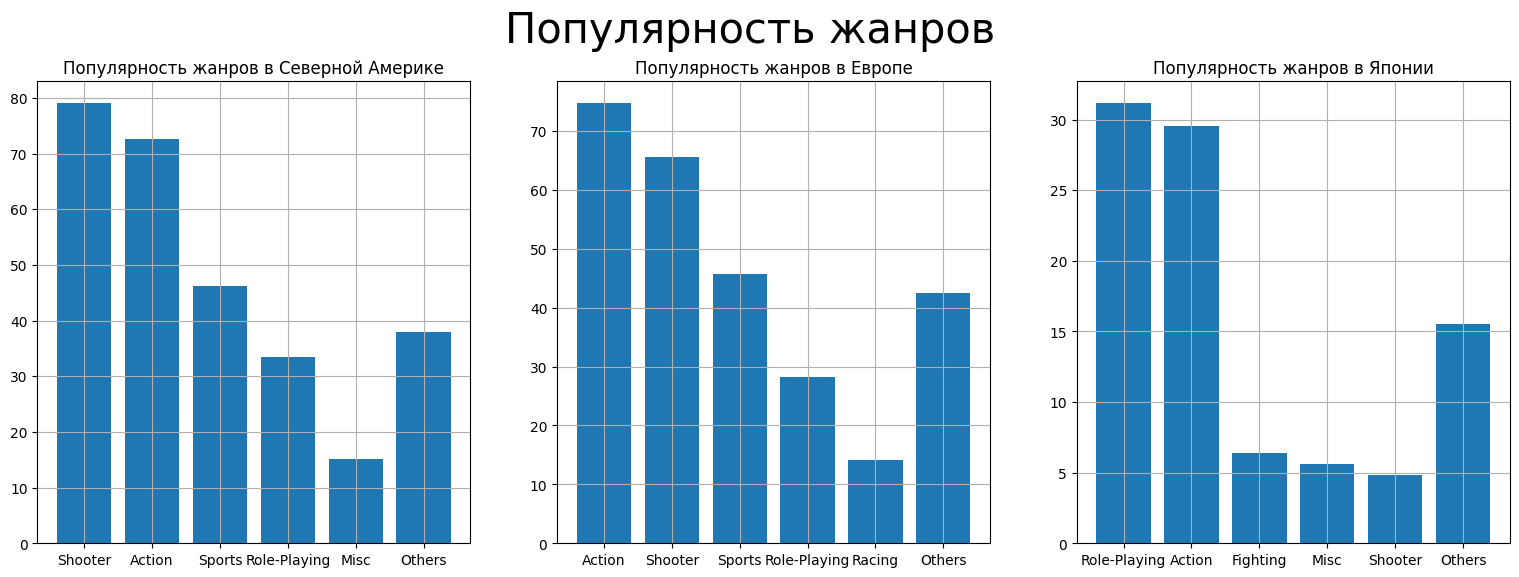

In [119]:
fig, (ax0,ax1,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(19,6))
ax0.grid(True)
ax0.set_title('Популярность жанров в Северной Америке')
ax0.bar(genre_na['genre'], genre_na['na_sales'])
ax1.grid(True)
ax1.set_title('Популярность жанров в Европе')
ax1.bar(genre_ea['genre'], genre_ea['eu_sales'])
ax2.grid(True)
ax2.set_title('Популярность жанров в Японии')
ax2.bar(genre_jp['genre'], genre_jp['jp_sales'])
fig.suptitle('Популярность жанров',
             y = 1,
             fontsize = 30);

В **Северной Америке** предпочитают автивные игры. Топ 3 жанра это Shooter, Action, Sports.

В **Европе** предпочтения те же, что и в Америке. Жанры в топ 3 меняются местами - это Action, Shooter, Sports.

А вот в **Японии** на первое место врывается Role-Playing. Не зря Япония является родиной косплея, здесь, судя по продажам, очень любят ролевые игры.
Второе место Action с близким результатом.\
Остальные жарны уступают с большим отрывом

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Вспомним обозначения рейтингов:
* **AO** (*1994–настоящее время*) - только для взрослых
* **М** (*1994–настоящее время*) - для детей от 17 лет и старше
* **T** (*1994–настоящее время*) - для детей от 13 лет и старше
* **E10+** (*2005–настоящее время*) - для детей старше 10 лет
* **E** (*1994-1998 (как **K-A**), 1998–настоящее время (как **E**)*) - для всех возрастов
* **EC** (*1994–2018*) - ориентированный на аудиторию дошкольного возраста. Этот рейтинг был признан устаревшим в 2018 году из-за редкости использования.

In [124]:
def top_rating (country_sales):
    return (
    good_data_games
    .pivot_table(index='rating_type', values = country_sales, aggfunc = 'sum')
    .reset_index()
    .sort_values(by=country_sales)
    .plot(kind='barh', x='rating_type', y=country_sales, grid=True, figsize=(12, 5))
)

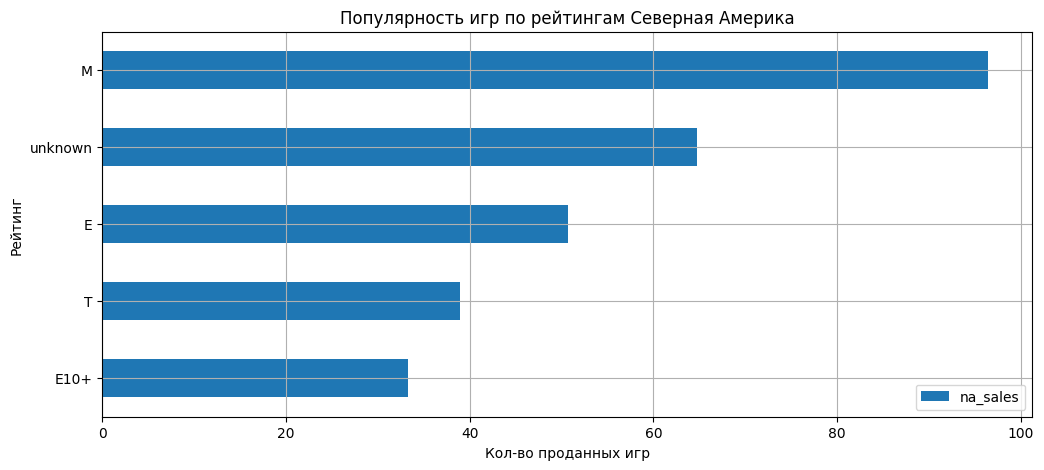

In [125]:
top_rating('na_sales')
plt.title('Популярность игр по рейтингам Северная Америка')
plt.xlabel('Кол-во проданных игр')
plt.ylabel('Рейтинг');

В Северной Америке лидер - игры с рейтингом M - для детей от 17 лет и старше.

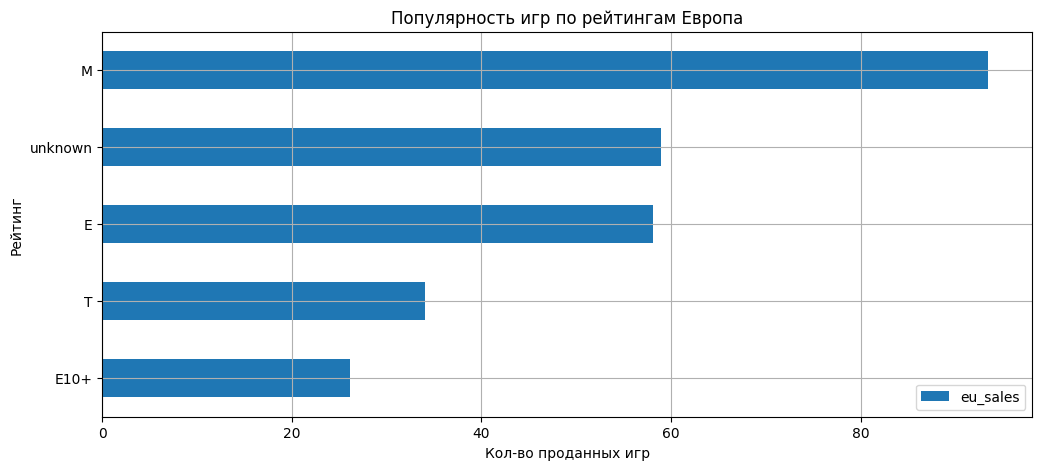

In [126]:
top_rating('eu_sales')
plt.title('Популярность игр по рейтингам Европа')
plt.xlabel('Кол-во проданных игр')
plt.ylabel('Рейтинг');

В Европе примерно та же картина, что и в Америке. 

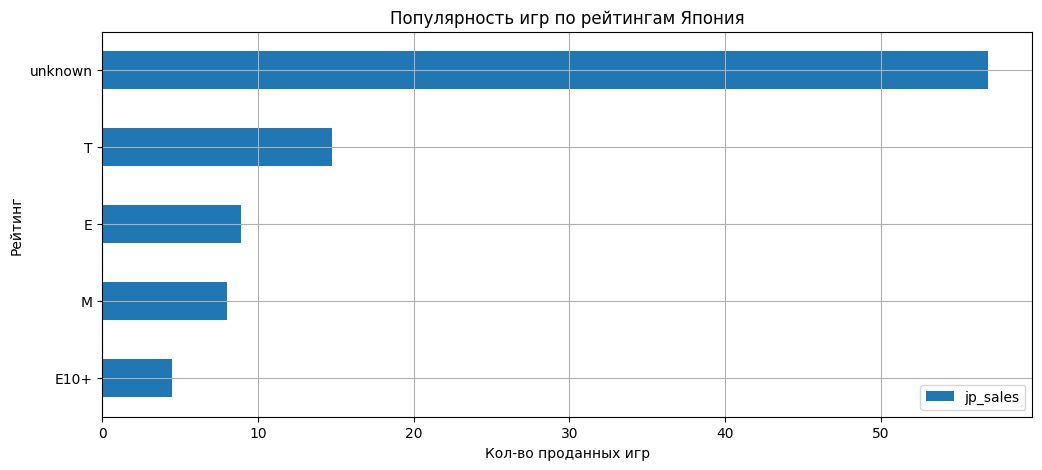

In [127]:
top_rating('jp_sales')
plt.title('Популярность игр по рейтингам Япония')
plt.xlabel('Кол-во проданных игр')
plt.ylabel('Рейтинг');

А вот Япония снова отличается. Первое место занимают игры без указанного рейтинга. Это может быть связано с тем, что сюда входят локальные для Японии игры и Американская компания их не оценивала. Вполне возможно у них есть своя внутренняя система рейтинга и они не отправляют в игры ESRB на оценку. 

Второе место **T** - для детей от 13 лет и старше и третье место рейтинг **E** - для всех возрастов. Видимо с цензурой в стране строже. Пользователи предпочитаю больше семейные добрые игры

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Заполнение пропусков в рейтинге позволило определить отличия региональных рынков, молодец

### Вывод по портретам пользователей каждого региона

**Северная Америка:** \
Топ жанры: Shooter, Action, Sports\
Платформы: PS4 и XOne забирают по 1/3 рынка каждая\
Лидер - игры с рейтингом **M** - для детей от 17 лет и старше.

**Европа:** \
Топ жанр: Action, Shooter, Sports\
Платформы: PS4 - почти половина всего рынка продаж, второе место XOne с 20% рынка. \
Лидер - игры с рейтингом **M** - для детей от 17 лет и старше.

**Япония:** \
Топ жанры: Role-Playing и Action\
Платформы: DS3 - почти половины от всех продаж, второе место PS4 и 16% рынка\
Лидер - игры без рейтинга по ESRB (скорее всего игры без локализации на Америку)

## Проверка гипотез

In [128]:
good_data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_type,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98


**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC равны;\
**Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [129]:
xbox = good_data_games[(good_data_games.platform == 'XOne') & (~good_data_games.user_score.isna())]['user_score']
pc = (
    good_data_games[(good_data_games.platform == 'PC')
                    & (~good_data_games.user_score.isna())]['user_score']
)
results = st.ttest_ind(xbox,pc)
alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу»')

0.10450507919348415
Не получилось отвергнуть нулевую гипотезу»


P-value - вероятность получить наблюдаемый результат при условии, что нулевая гипотеза верна. У нас p_value около 10% - слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовтельскими рейтингами 2х платформ.
Это не позволяет отвергнуть нулевую гипотезу

По всей видимости средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковые.Но обладая лишь выборкой, невозможно достоверно сделать вывод о генеральной совокупности.


**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны;\
**Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.

In [130]:
action = good_data_games[(good_data_games.genre == 'Action') & (~good_data_games.user_score.isna())]['user_score']
sports = good_data_games[(good_data_games.genre == 'Sports') & (~good_data_games.user_score.isna())]['user_score']

results = st.ttest_ind(action,sports)
alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу»')

2.8711147985105864e-19
Отвергаем нулевую гипотезу


P_value критически мала. 
Предположение, что средние пользовательские рейтинги жанров Action и Sports одинаковые - неверно. Можем отвергнуть эту гипотезу.

## Общий вывод

* **Общая картина по выпуску игр в разные года**

C 1980х и до середины 90х годов выпущено очень маленкое кол-во игр. Все логично, технологии еще только начинают развиваться и доступность игр на плохом уровне. Потом начинается рост. Пик выпуска игр приходится на 2008-2009 год. После 2011 года видим снижение продаж игр. Можно сказать, что с 2012 года идет кризисная полоса в игровой индустрии.

На момент 2016 года больше всего копий игр продано на приставку от Sony PS2 - примерно 1 255 млн копий. Следом в пятерку входят X360, PS3, Wii, DS


* **Срок жизни платформ**

Характерный срок жизни платформы - около 10 лет. Затем либо выходит новое покление от этого производителя, либо от другого. Пик продаж игр приходится примерно на 5-6 год существования платформы.


* **Топ-платформы**

На момент исследования по продажам лидирует PS4. Она так же является одной из перспективных платформ на ближайшие несколько лет. Вторая такая платформа XOne. На эти платформы игры выпускают только с 2013 года. Зная, что обычно пик продаж приходится на 5-6 год, можно ожидать рост продаж на этих двух платформах в 2017 году.
Стоит учитывать факт, что согласно исследованию игр на PS4за предыдущие периоды продалось примерно вдвое больше, чем на XOne.


* **Корреляции оценок и продаж** 

Нет сильной корреляции оценки критиков и пользователей с суммарными продажами игр. Многие игры с высокими оценками проданы малым тиражом и так же встречаются игры со средними оценками, но проданный огромными тиражами в несколько миллионов.
Однако почти все игры с большими тиражами имеют оценку критиков выше средней.
Однако можно сказать, что так же есть средняя связь между оценками пользователей и оценками критиков. Видимо мнения часто сходятся 


* **Популярность жанров** 

Самым популярные жанры последних 2,5 лет - Action и Shooter
Однако продажи Шутеров более стабильные и предсказуемые, а отличие от Экшенов. Большинство Экшенов продается не очень большими тиражами. Однако в этом жанре много бестселлеров. Так же можно отметить, что именно игр этого жанра за последние годы выпустили больше всего.

И на третье место можно поставить сразу 2 жанра - Role-Playing и Sports\
А вот Puzzle у пользователей не в почете. Последнее место с огромнейшим отрывом.


* **Портреты пользовтелей по регионам:** 

**Северная Америка:**\
Топ жанры: Shooter, Action, Sports\
Платформы: PS4 и XOne забирают по 1/3 рынка каждая\
Лидер - игры с рейтингом **M** - для детей от 17 лет и старше.

**Европа:**\
Топ жанр: Action, Shooter, Sports\
Платформы: PS4 - почти половина всего рынка продаж, второе место XOne с 20% рынка. \
Лидер - игры с рейтингом **M** - для детей от 17 лет и старше.

**Япония:**\
Топ жанры: Role-Playing и Action\
Платформы: DS3 - почти половины от всех продаж, второе место PS4 и 16% рынка\
Лидер - игры без рейтинга по ESRB (скорее всего игры без локализации на Америку)

* **Гипотезы:** 

Проверив гипотезу **"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"** не смогли ее отвергнуть.
По всей видимости средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковые. Но обладая лишь выборкой, невозможно достоверно сделать вывод о генеральной совокупности.

Проверив гипотезу **"Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые"** - с большой долей вероятности можем отвергуть ее.
Скорее всего, предположение, что средние пользовательские рейтинги жанров Action и Sports одинаковые - неверно.

**ЗАДАНИЕ:** *Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.*

Нужно сделать ставку на игры для платформ **PS4 и XOne**, т.к. они находятся в растущем тренде, в отличие от остальных платформ. \
Так же, хоть и на падающем тренде, но **3DS** показывает неплохой объем продаж (более 20 млн копий).\
30-тилетняя история персональных компьютеров говорит, что игры для **PC** можно так же включить.

Для рынков Америки и Европы - самый любимый и продаваемый жанры **Action и Shooter** с рейтингом M, для Японии - **Role-Playing и Action**. Можно сделать упор именно на эти жанры. 